In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
n_home = pd.read_csv('COVID-19_Nursing_Home_Dataset.csv', low_memory=False)
s_rate = pd.read_csv('Star_Ratings.csv', low_memory=False)

In [4]:
n_home = n_home.convert_objects(convert_numeric=True)
s_rate = s_rate.convert_objects(convert_numeric=True)

In [5]:
st = s_rate['Provider State'].sort_values()
s_o = st.unique()
a_r = s_rate.groupby('Provider State').mean()

In [6]:
avg_rating = a_r[['Overall Rating', 'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating', 'Short-Stay QM Rating'
                  ,'Staffing Rating', 'RN Staffing Rating']]

# Visualizing Different Average Rating State Wise

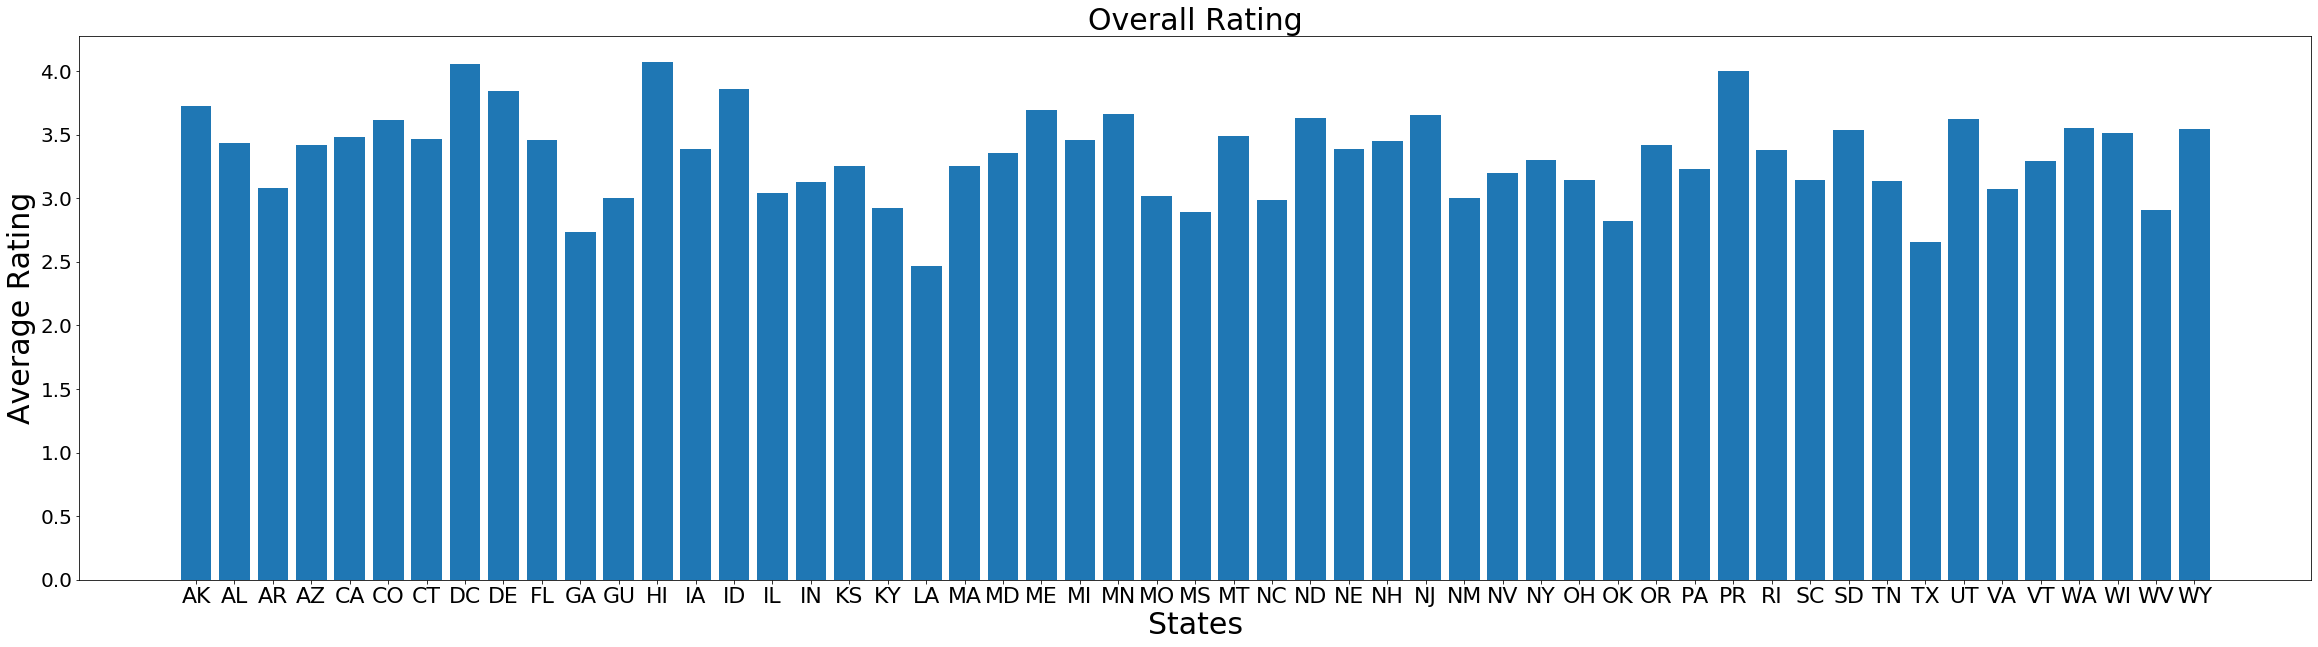

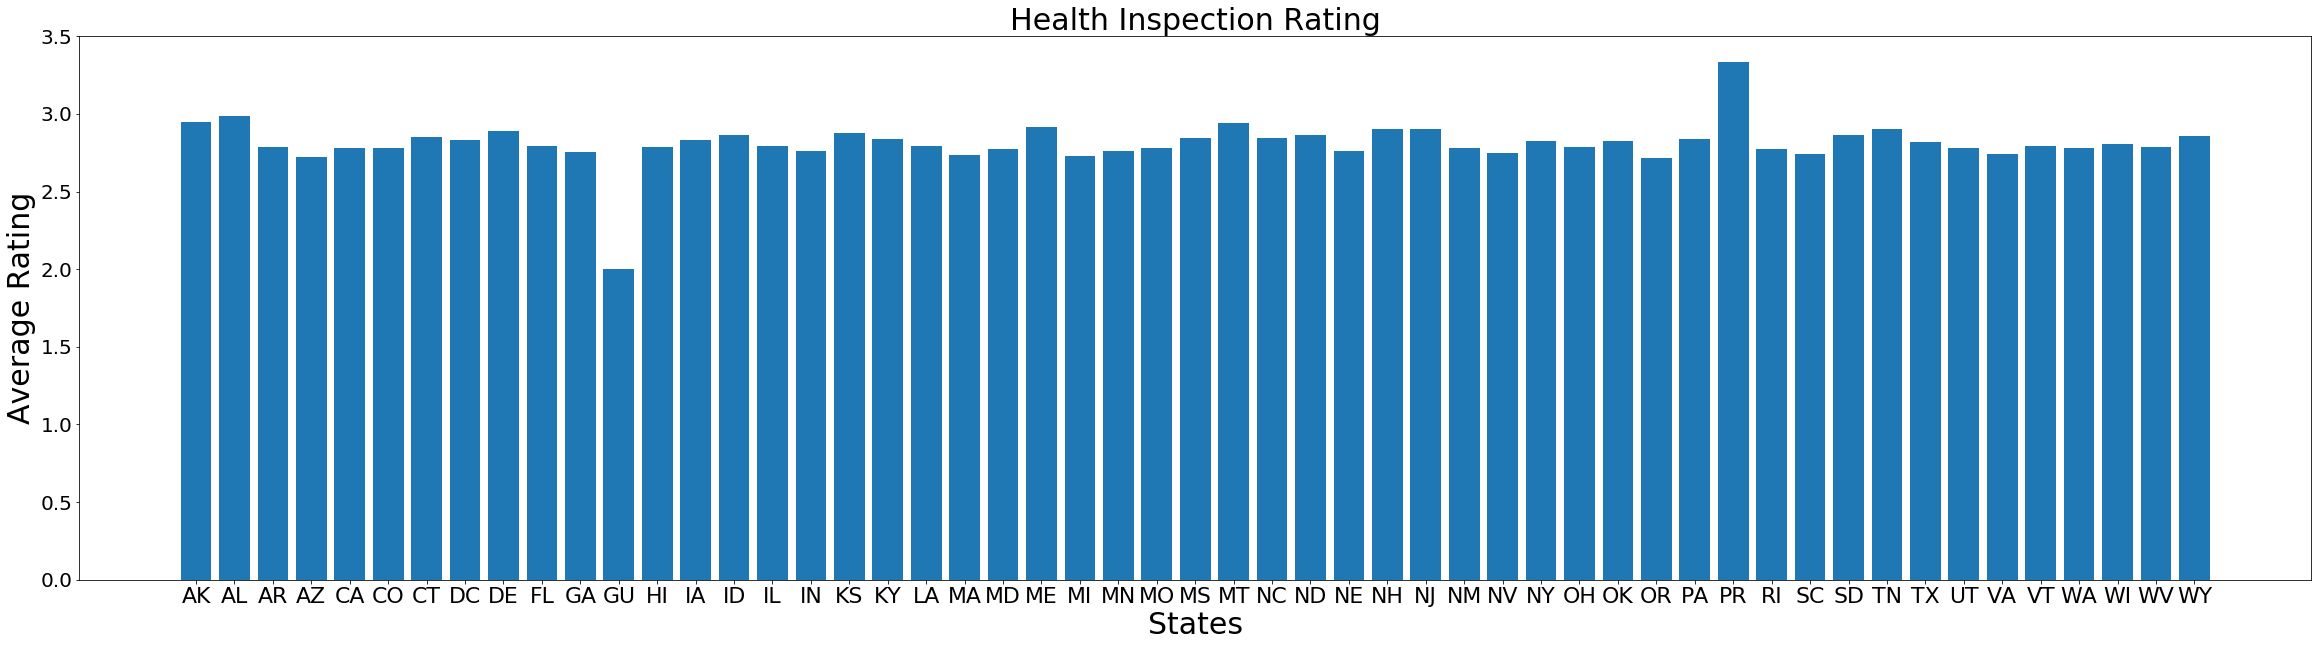

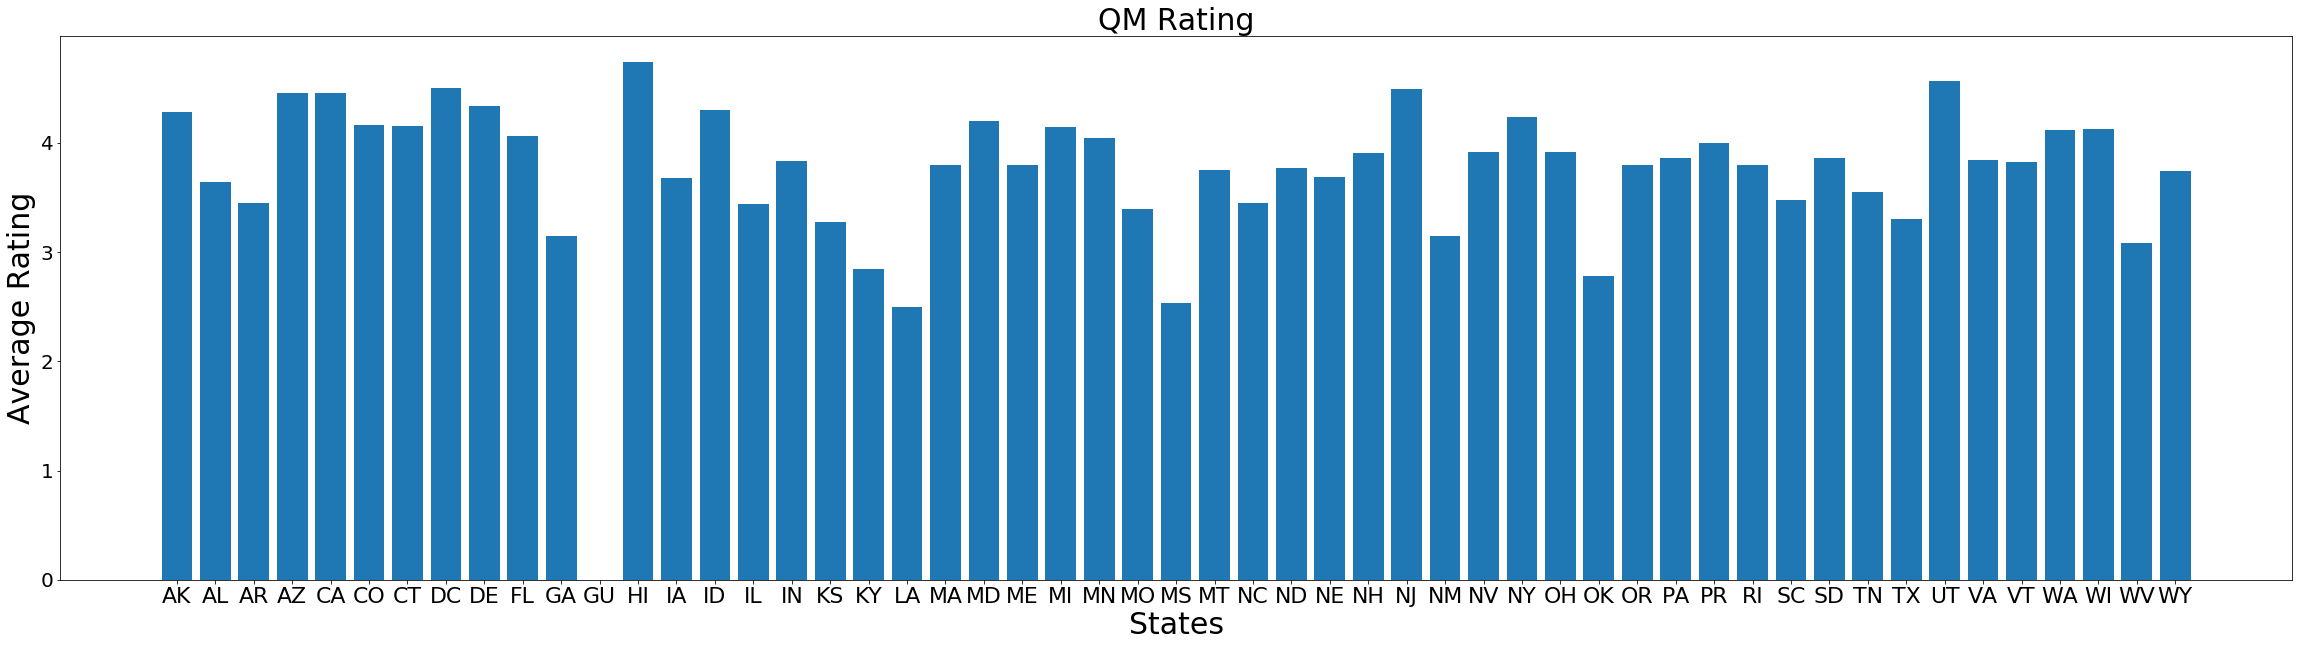

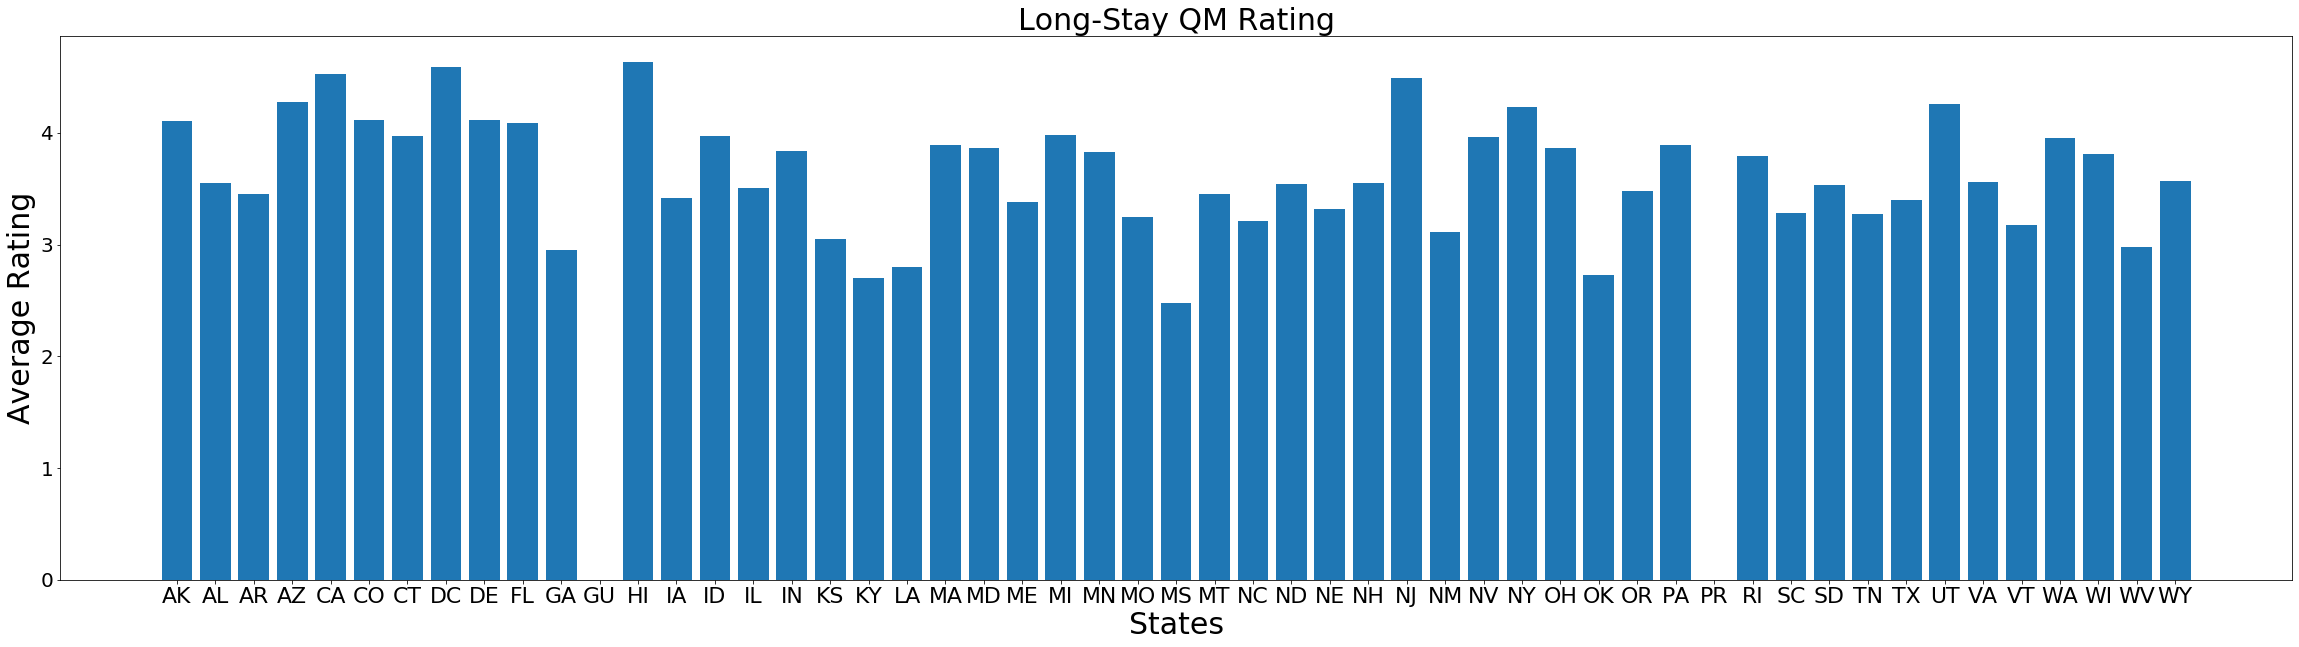

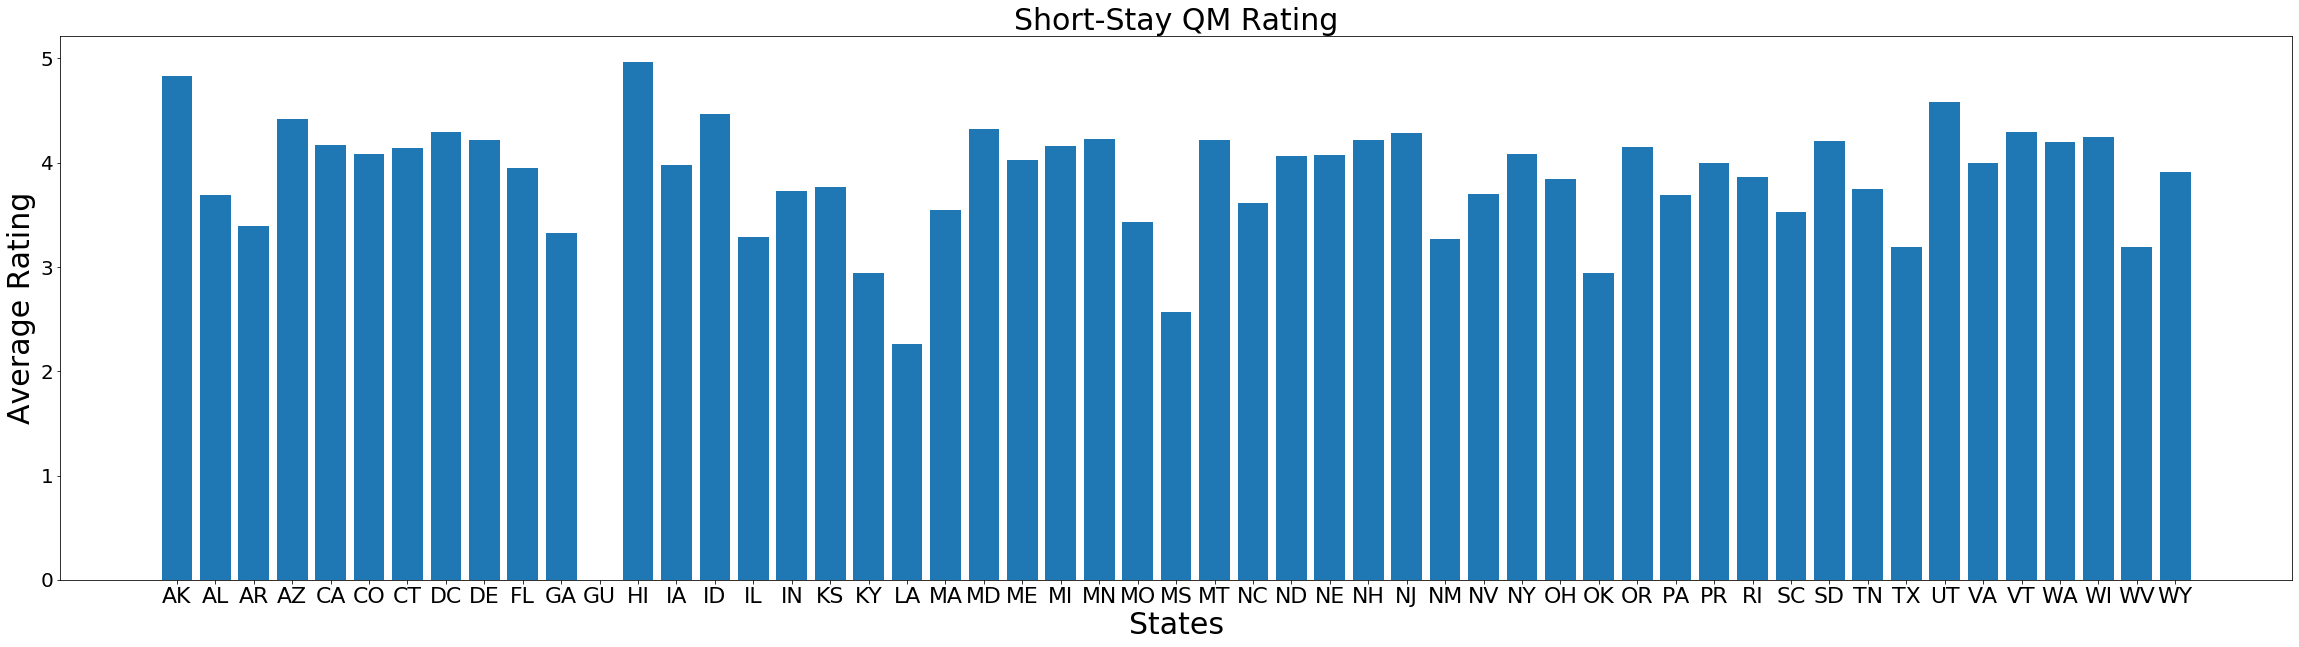

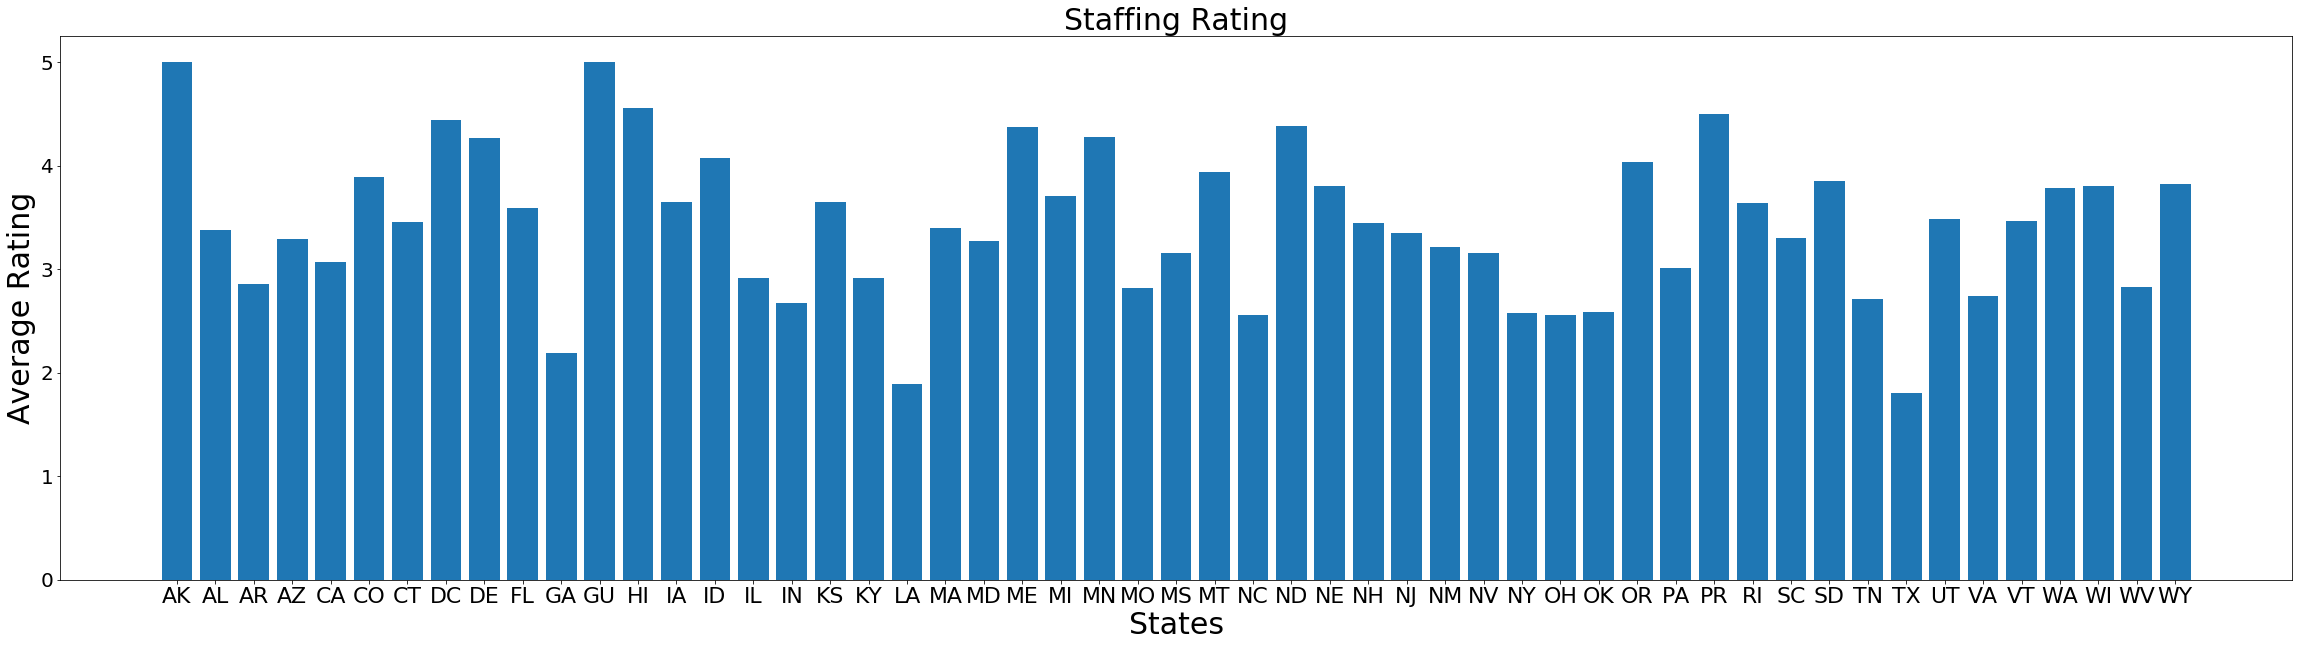

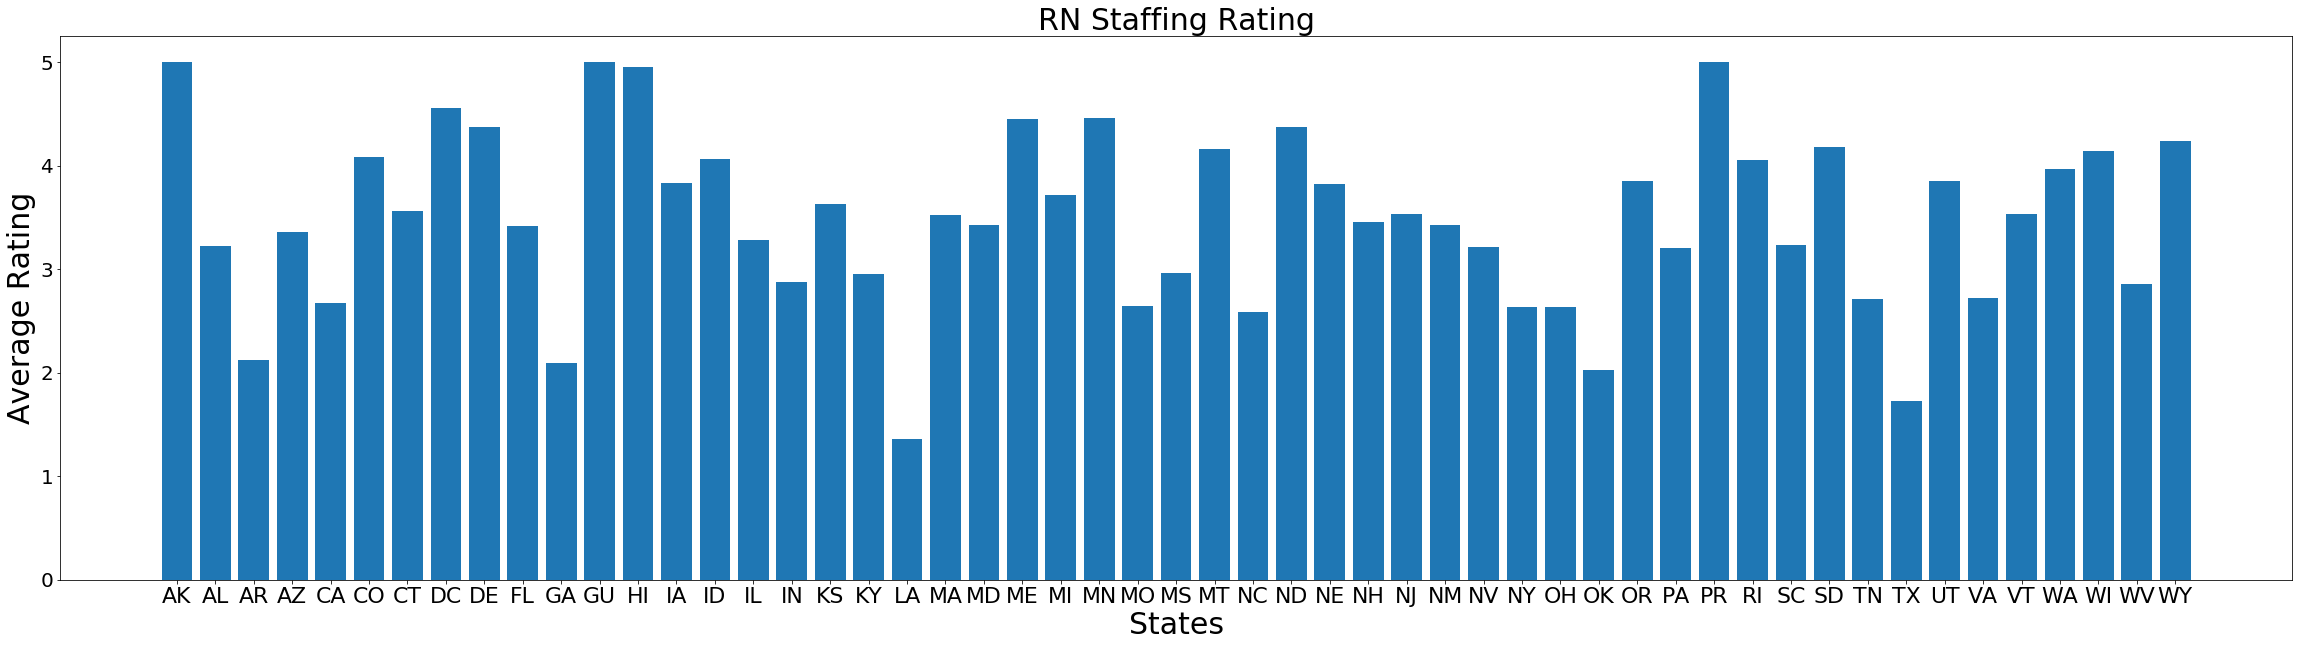

In [7]:
for i in avg_rating:
    fig = plt.figure(figsize = (40, 10)) 
    plt.bar(s_o,avg_rating[i])
    plt.xlabel('States', size = 30)
    plt.ylabel('Average Rating', size = 30)
    plt.title(i, size = 30)
    plt.xticks(size = 22)
    plt.yticks(size = 20)

From all the above ratings we can see that state LA had the least average rating among all other states. So drilling further down into the reasons.

## Visualizing Count of Federal Providers per Rating

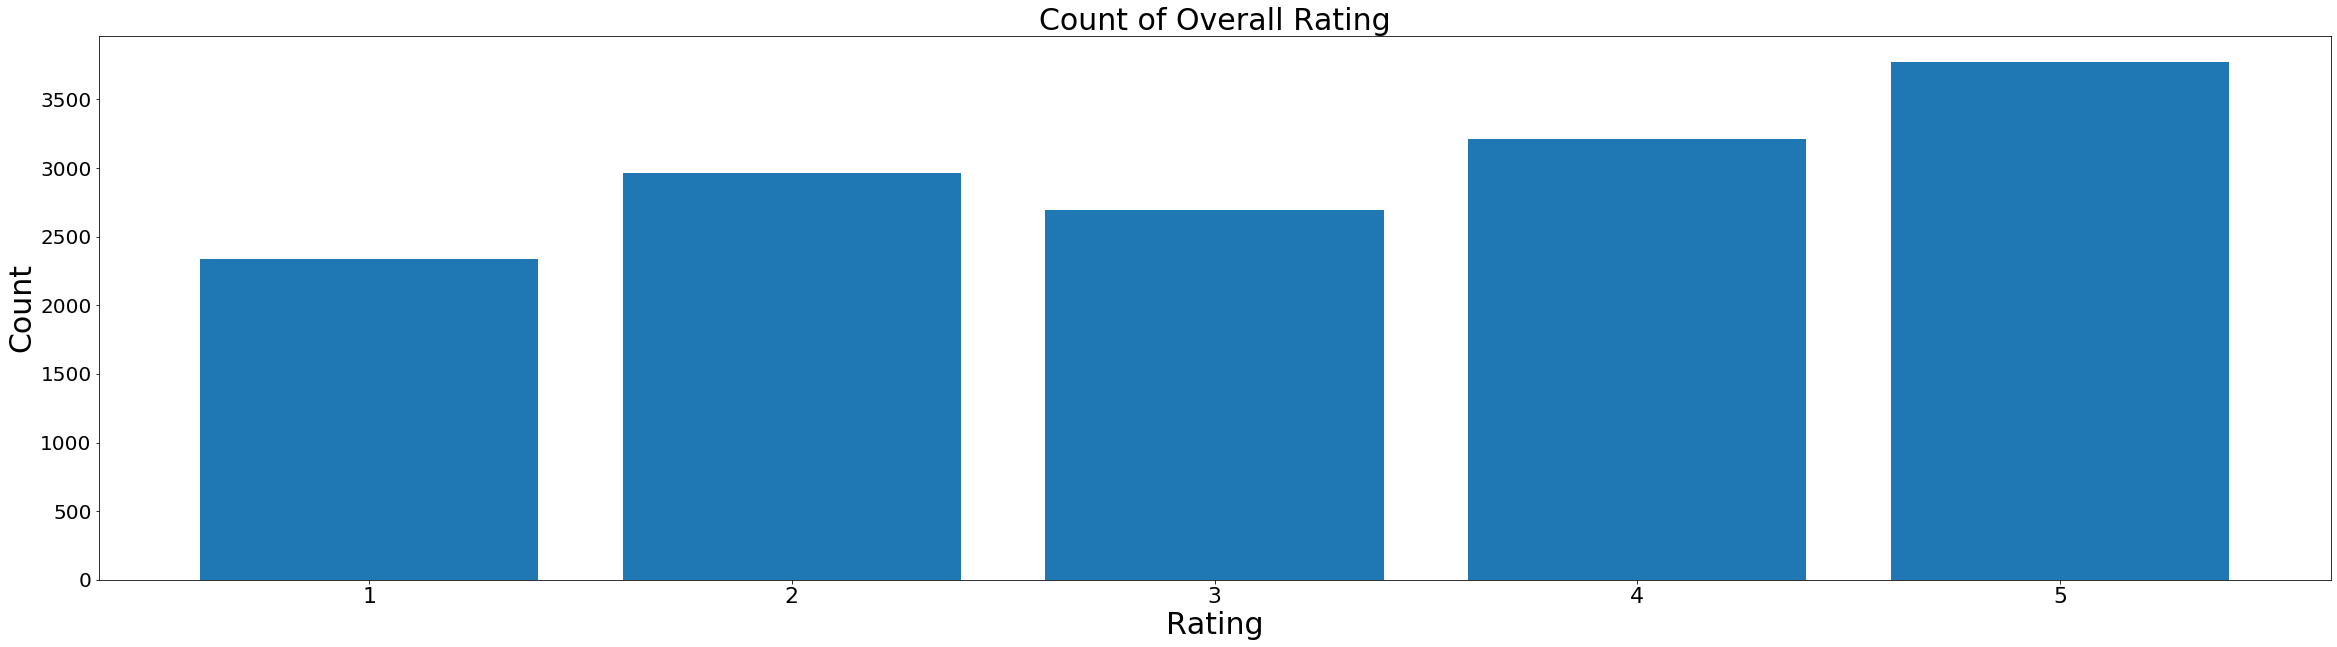

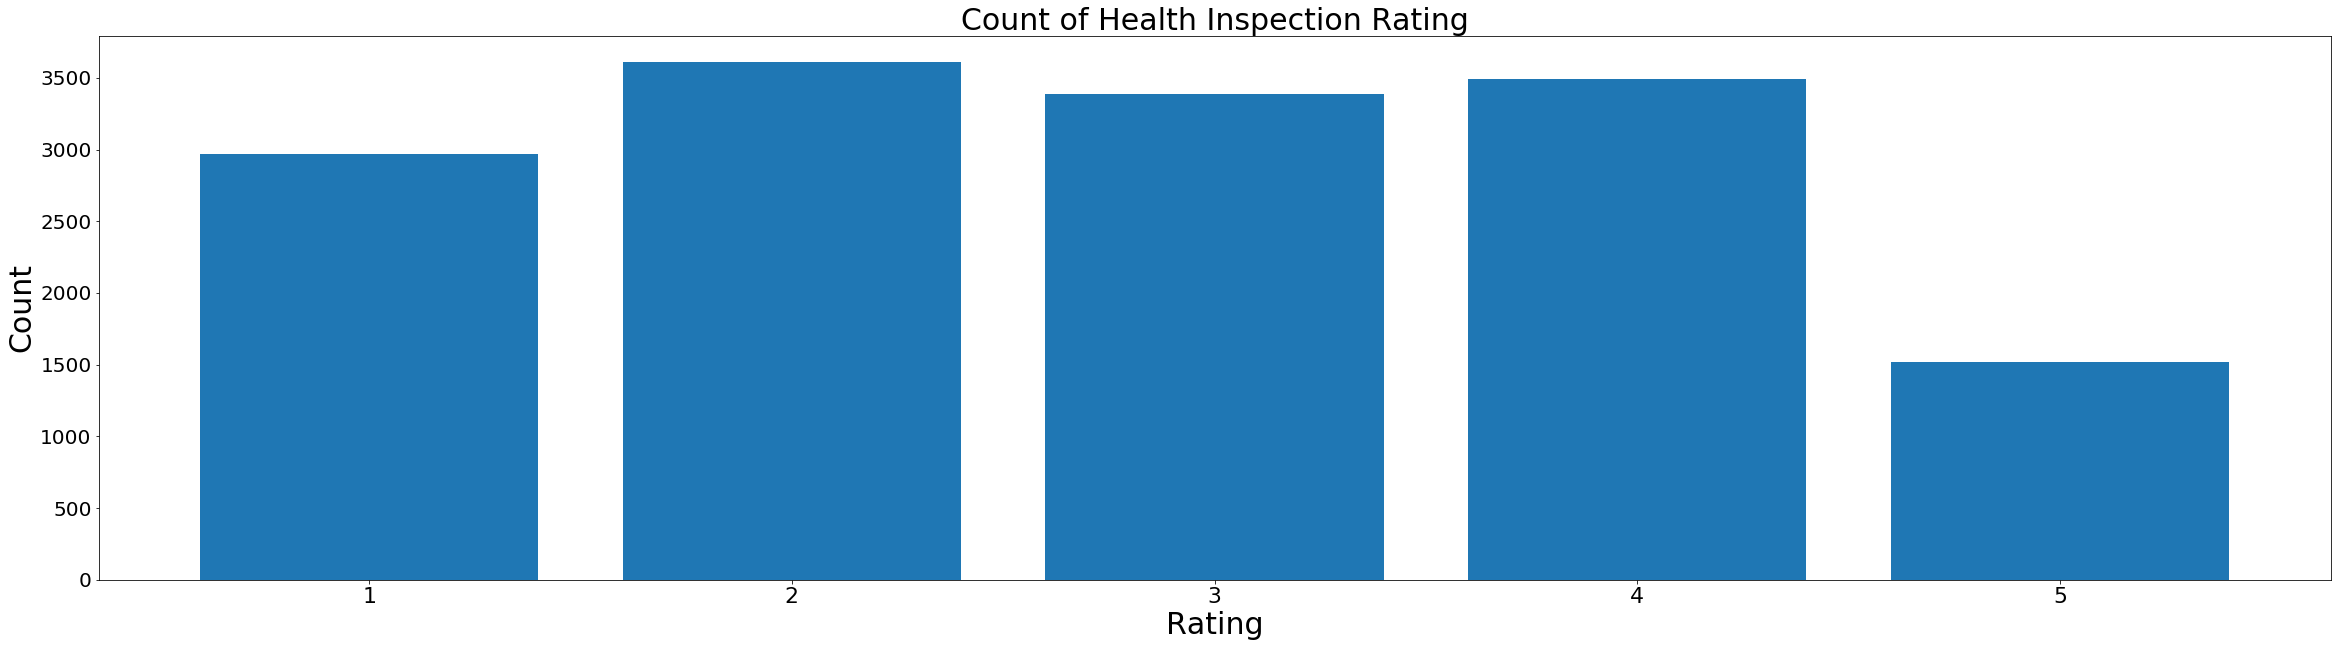

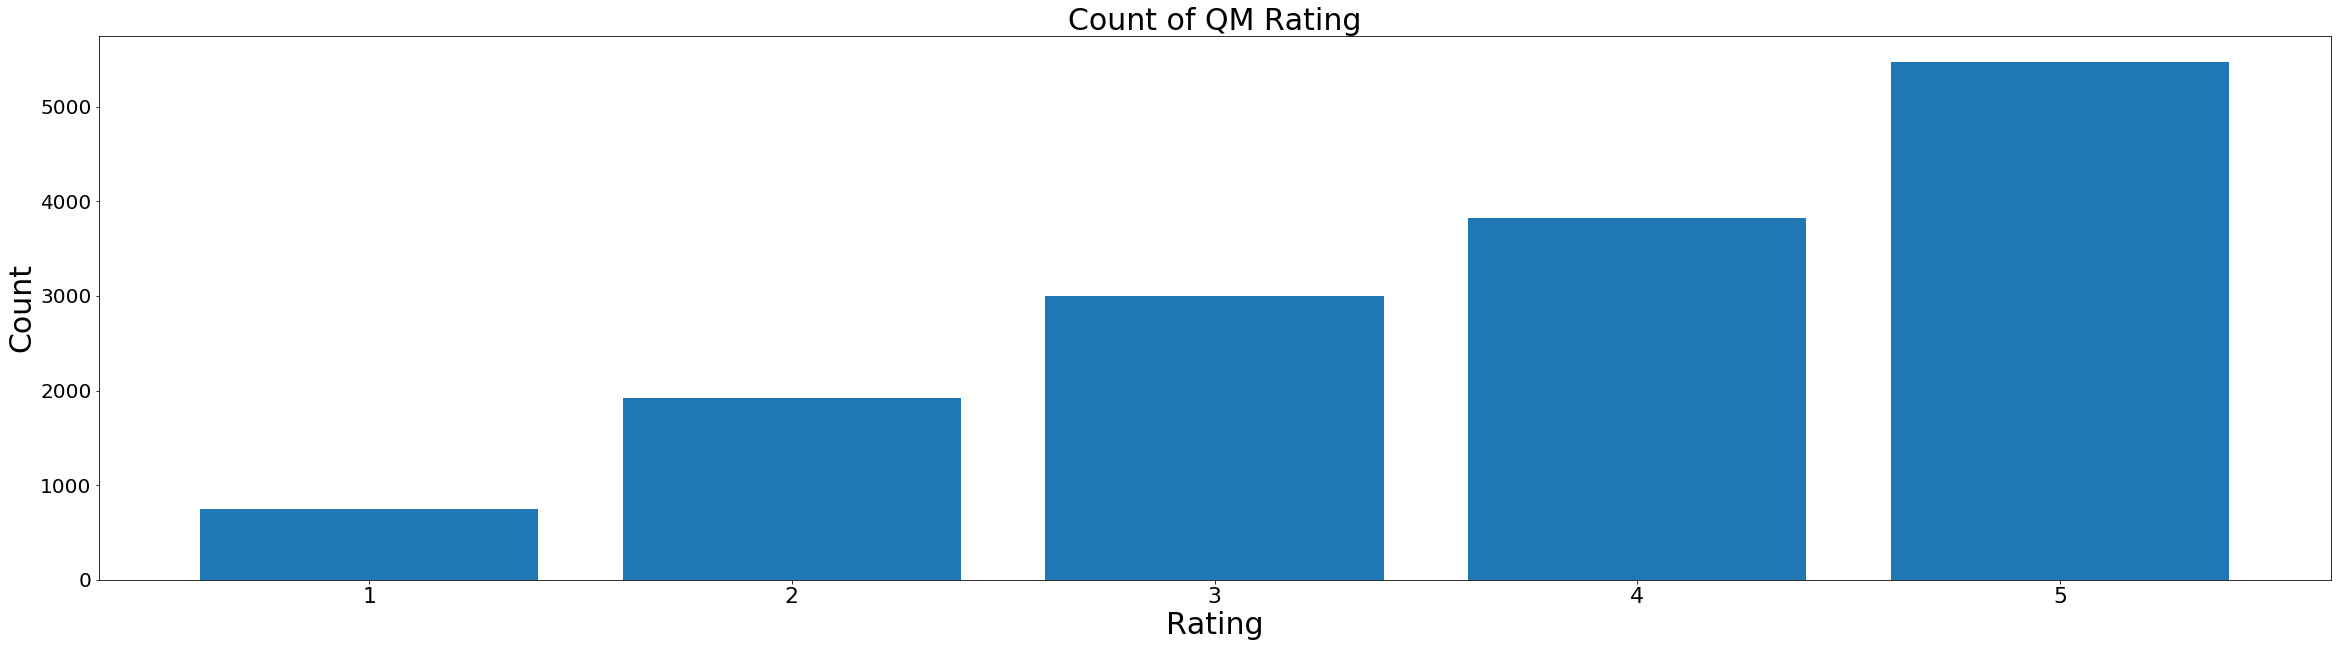

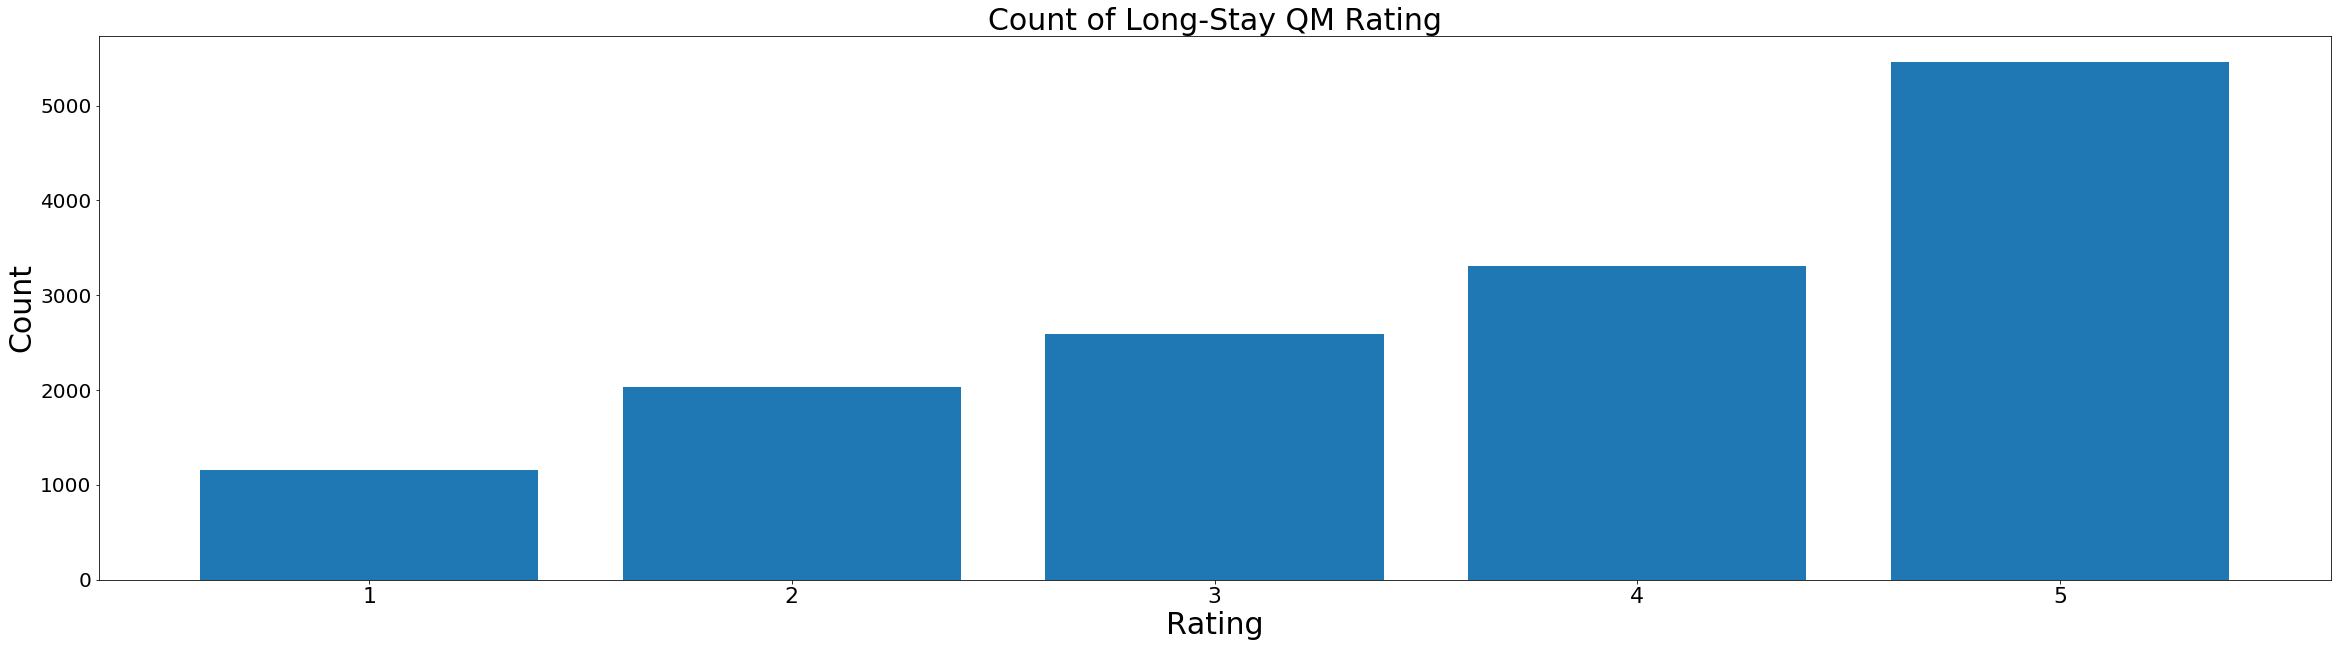

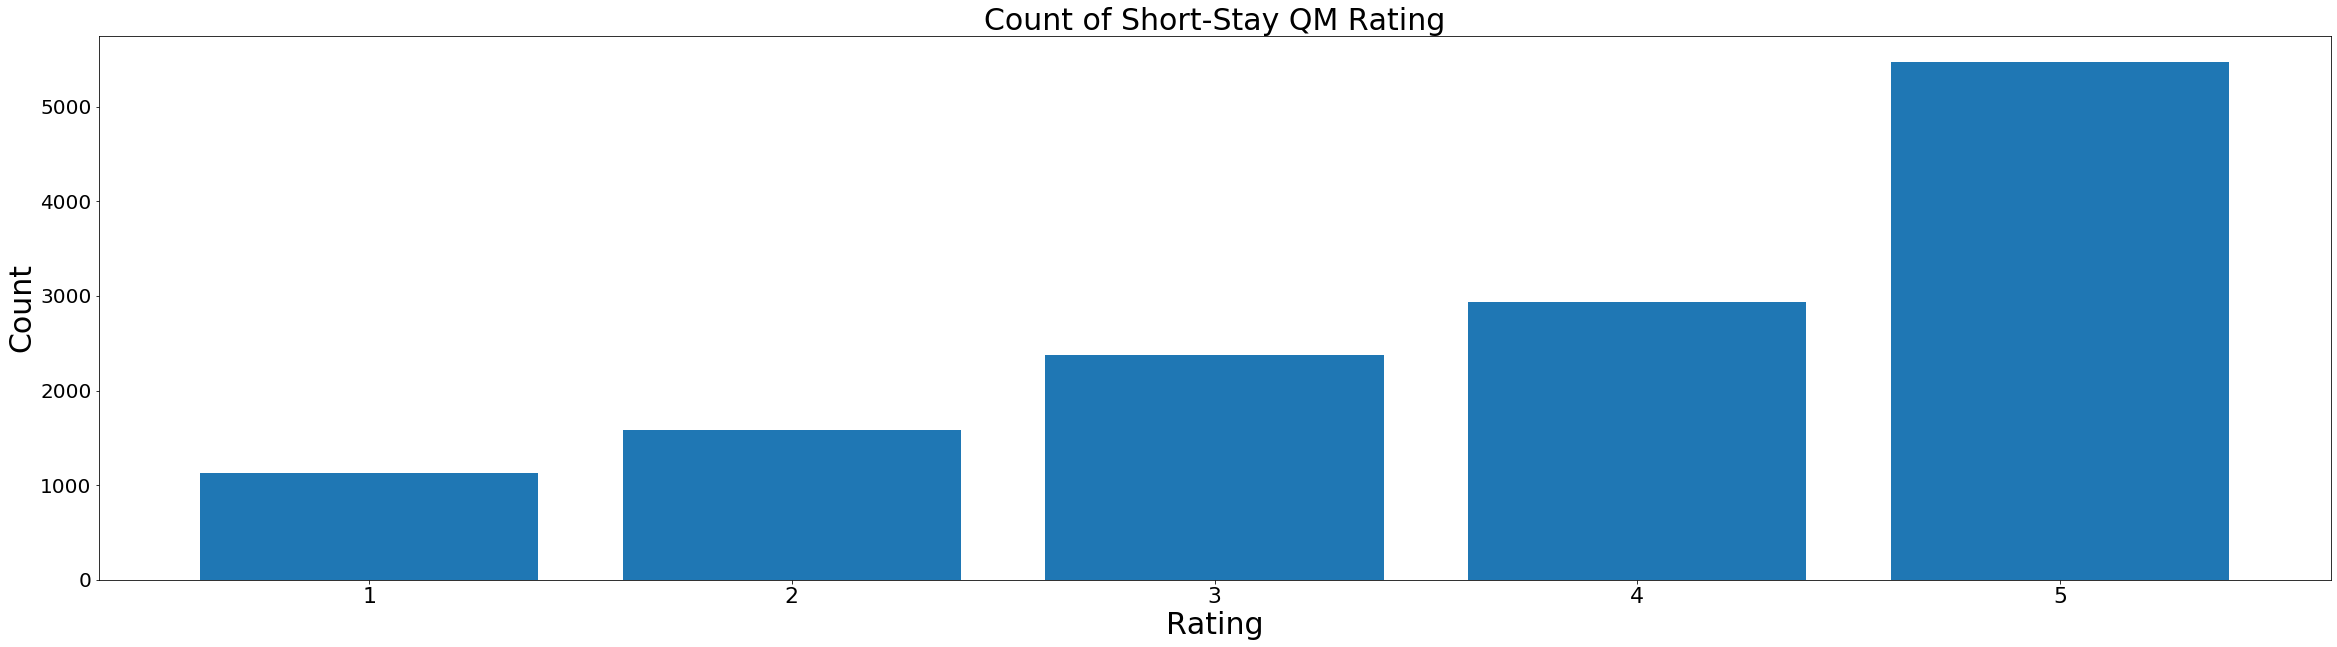

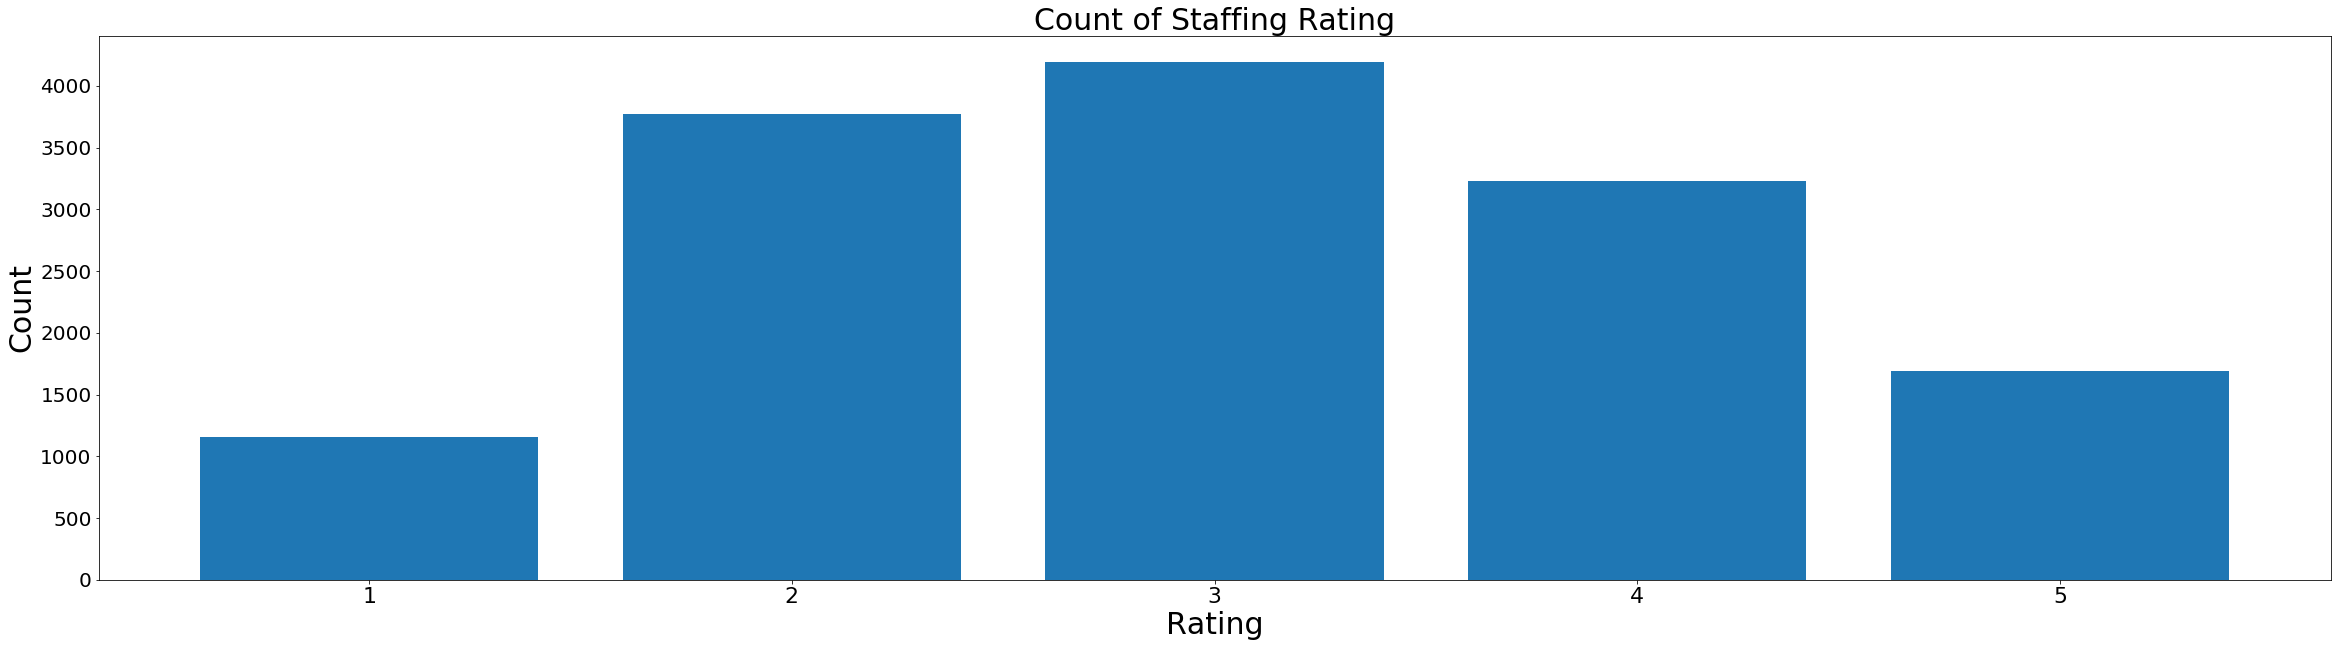

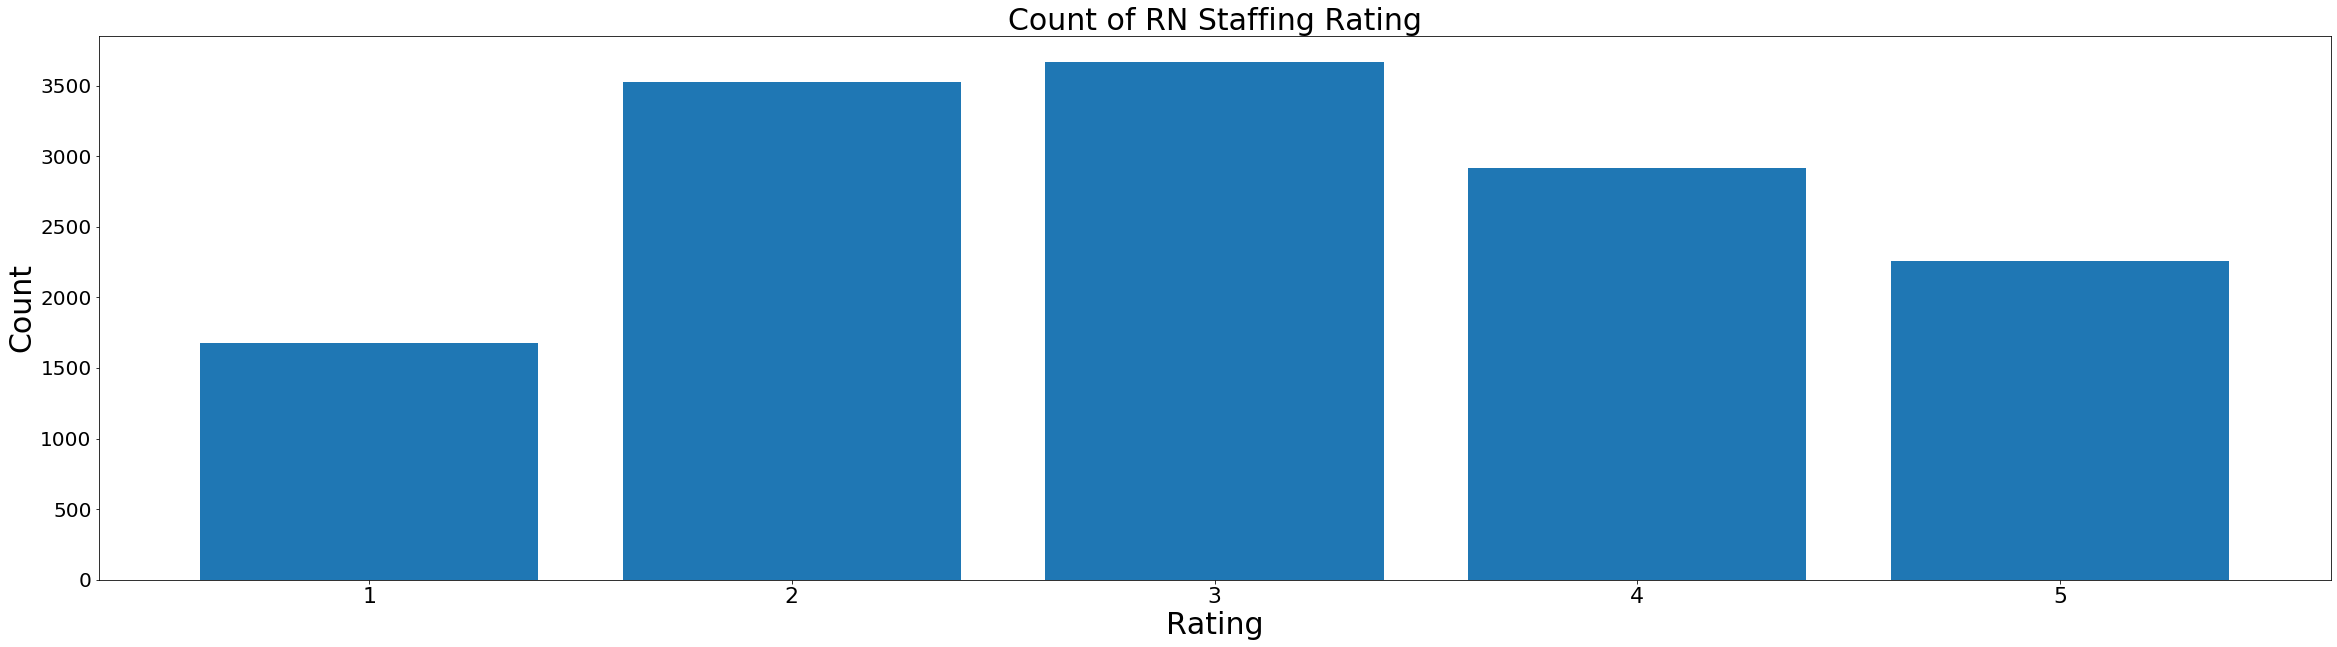

In [9]:
for j in avg_rating:
    rate = s_rate.groupby(j).count()
    r_sort = s_rate[j].sort_values().dropna()
    r = r_sort.unique()
    fig = plt.figure(figsize = (40, 10)) 
    plt.bar(r,rate['Federal Provider Number'])
    plt.xlabel('Rating', size = 30)
    plt.ylabel('Count', size = 30)
    plt.title('Count of ' +j, size = 30)
    plt.xticks(size = 22)
    plt.yticks(size = 20)

We will be looking further into the data of LA state since it has the least rating in all areas we can try to identify 
the root causes and extend those reasons to the other states and thus nursing homes

# Data Analysis for LA State

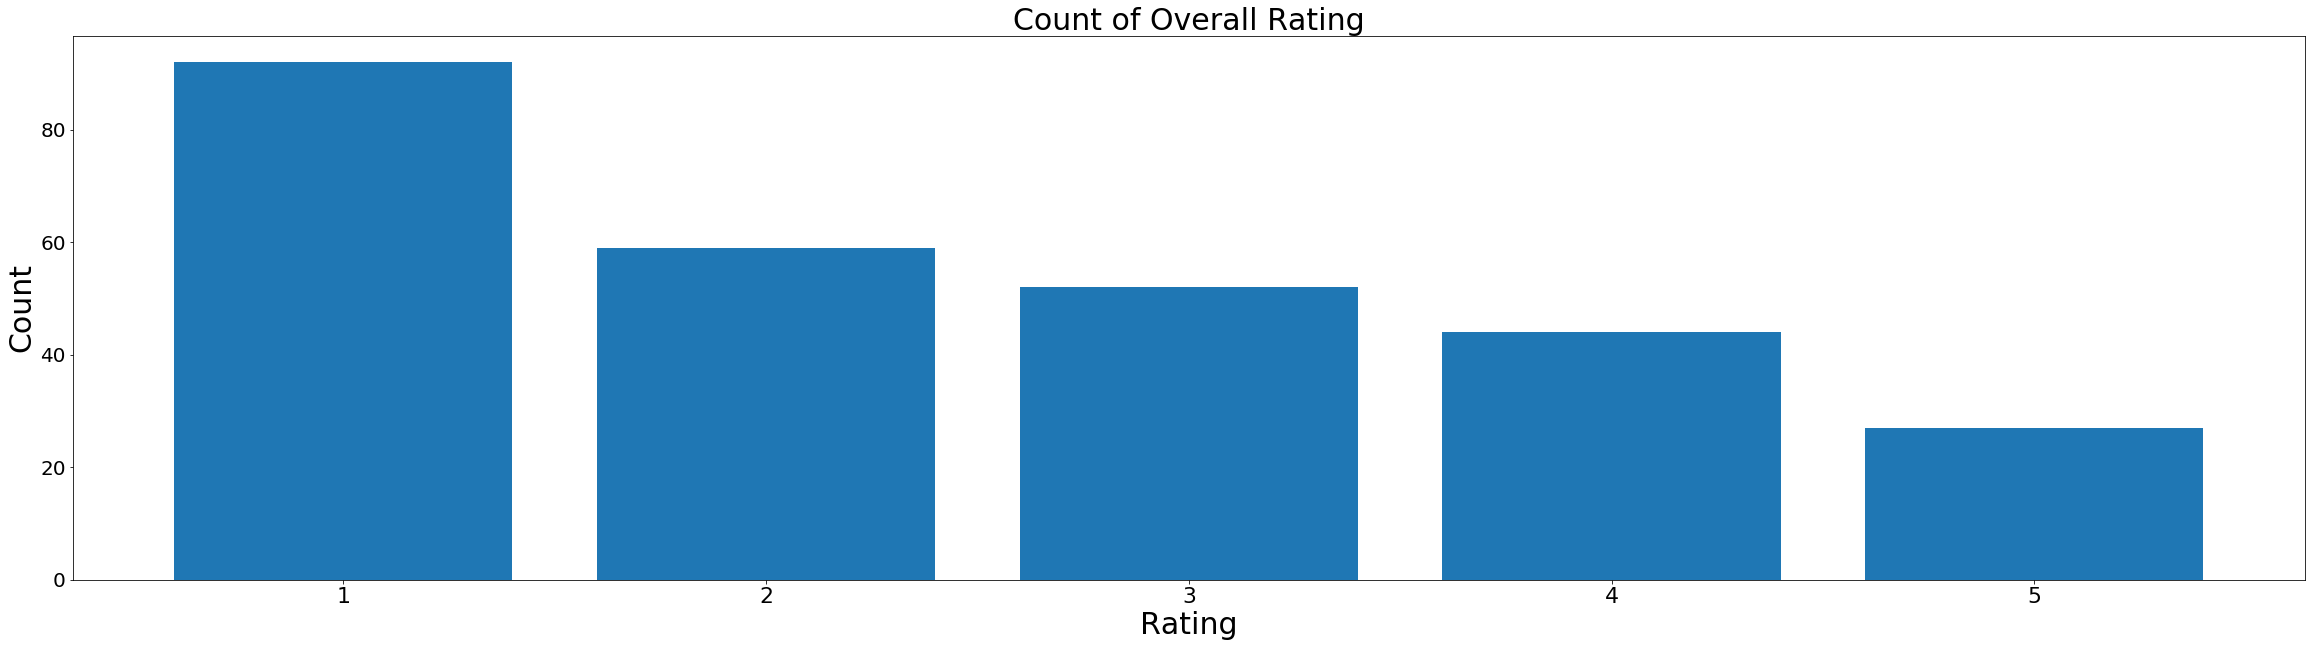

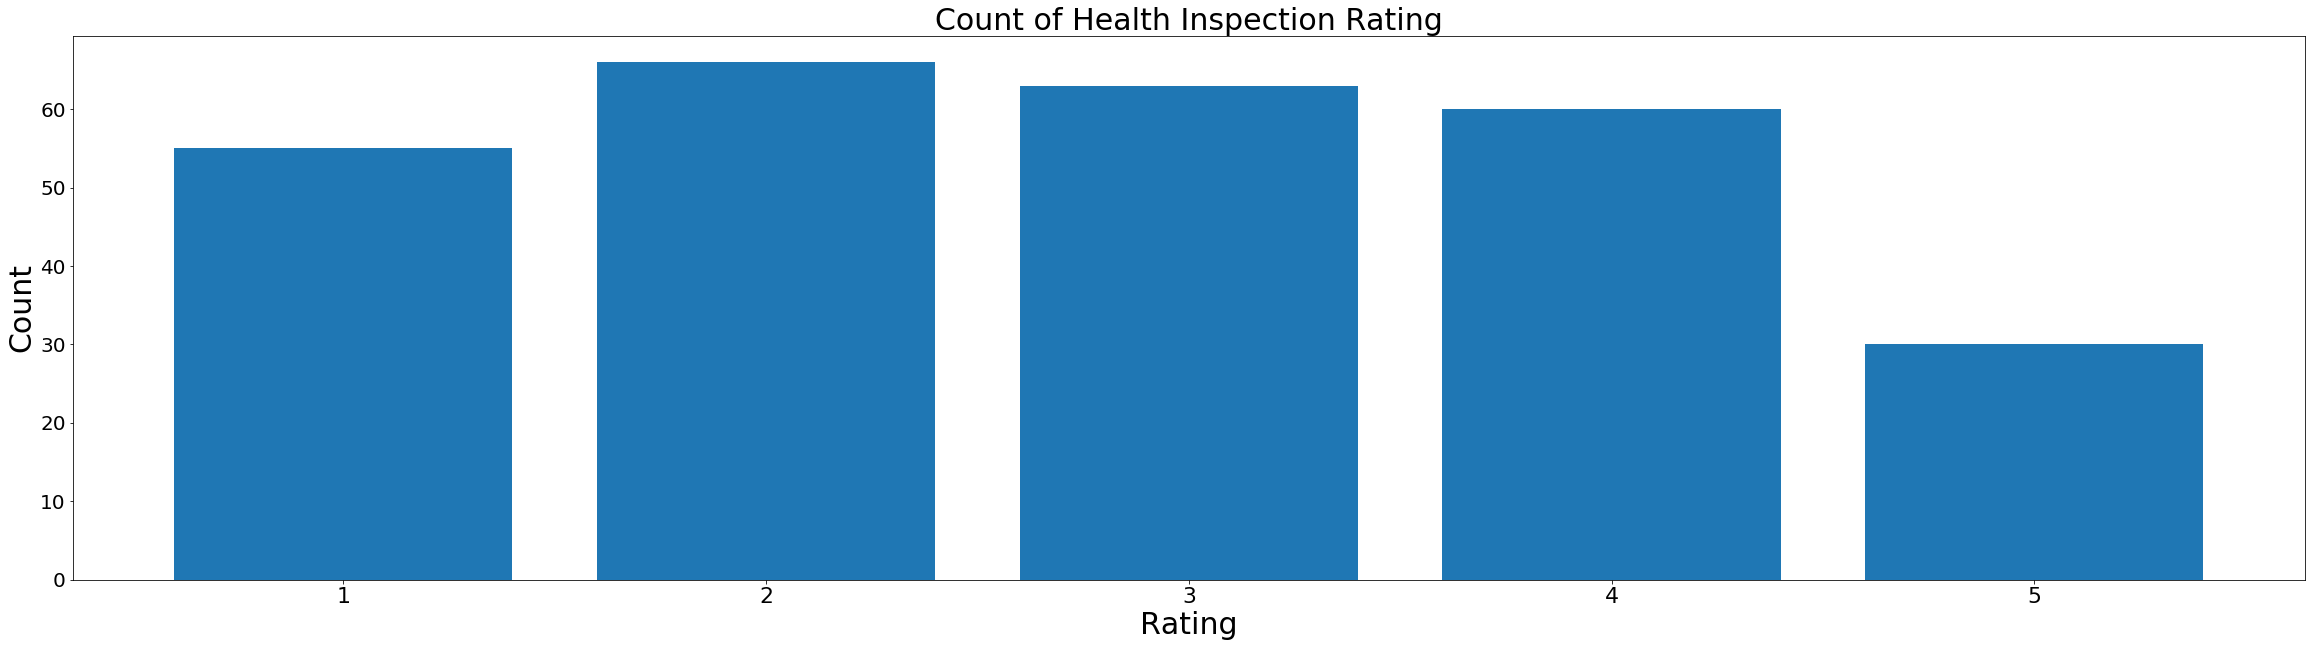

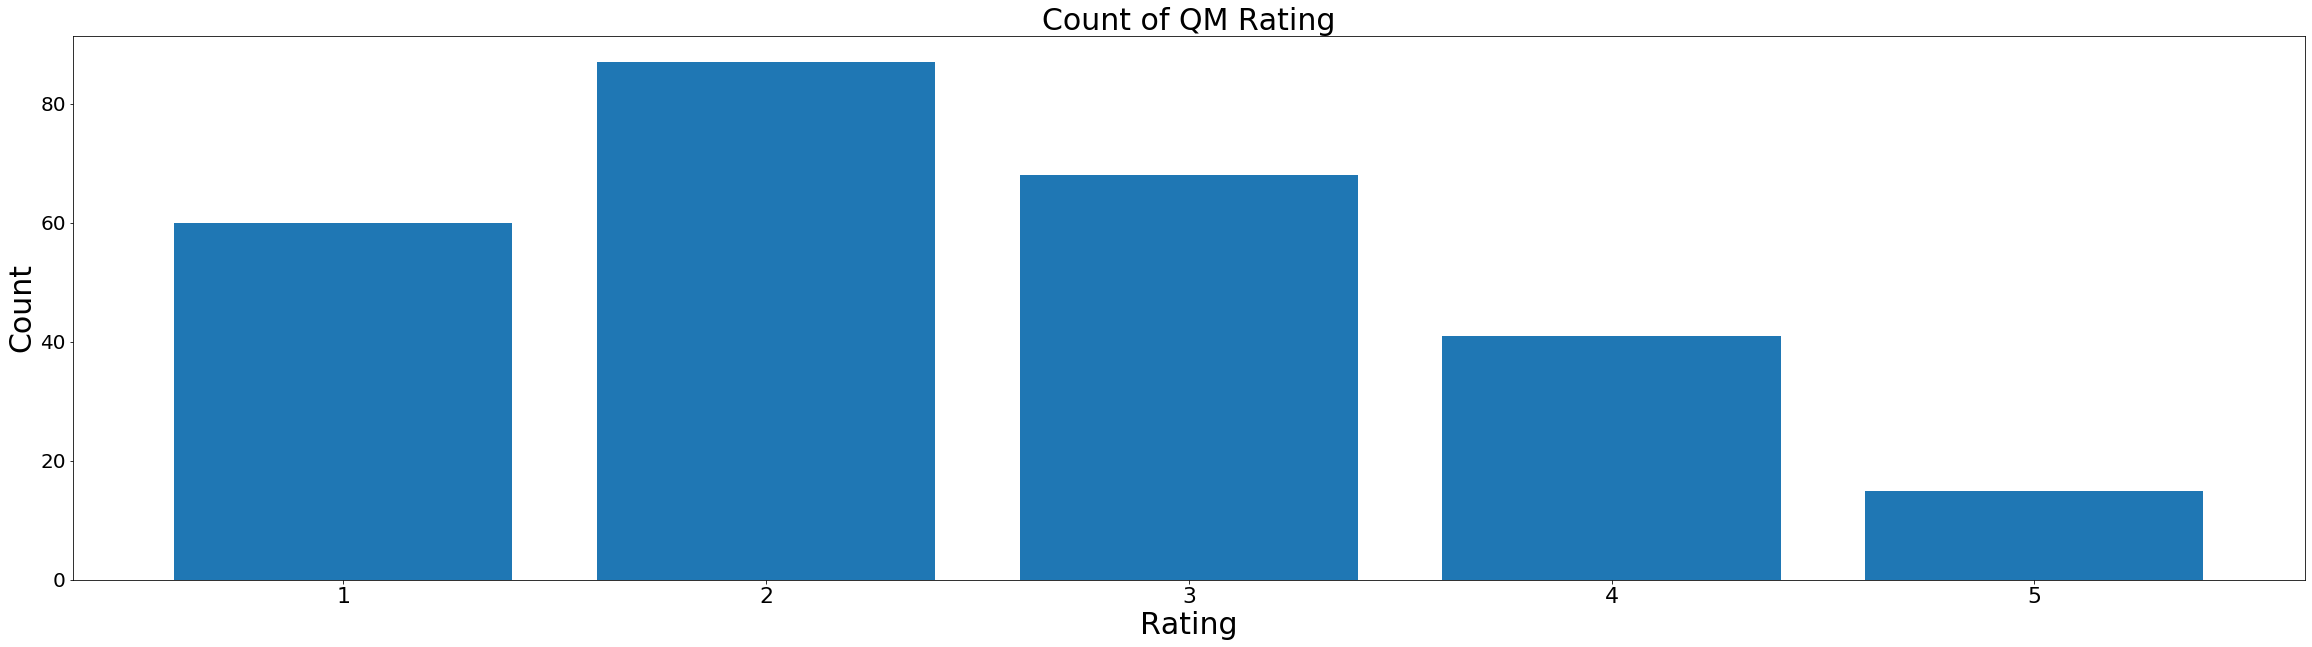

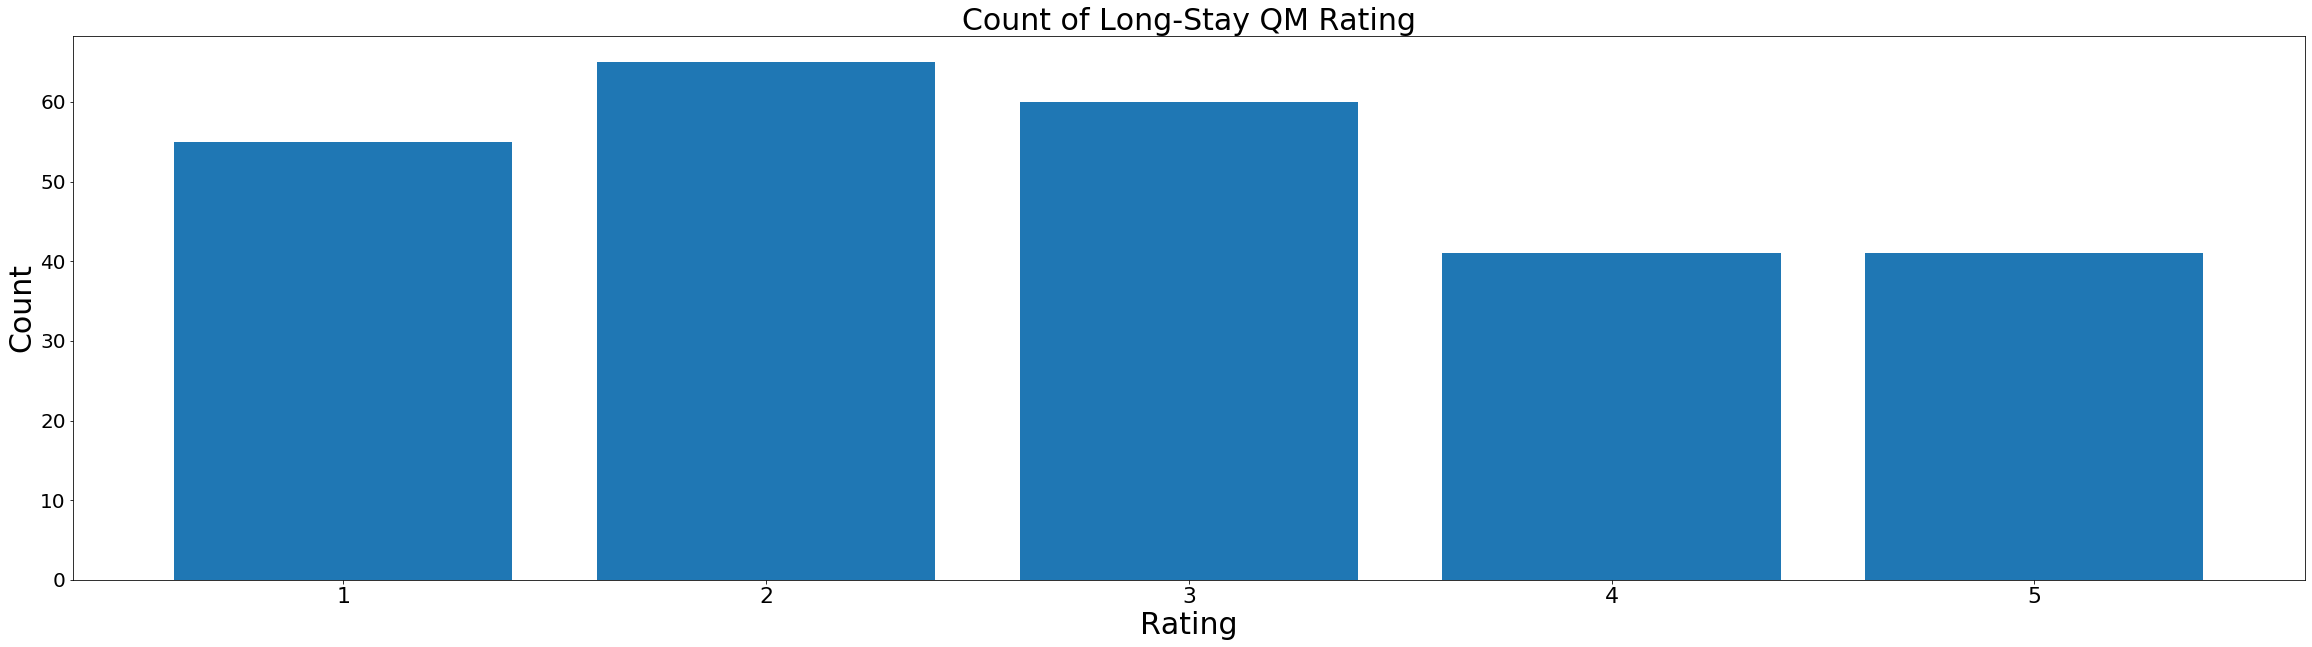

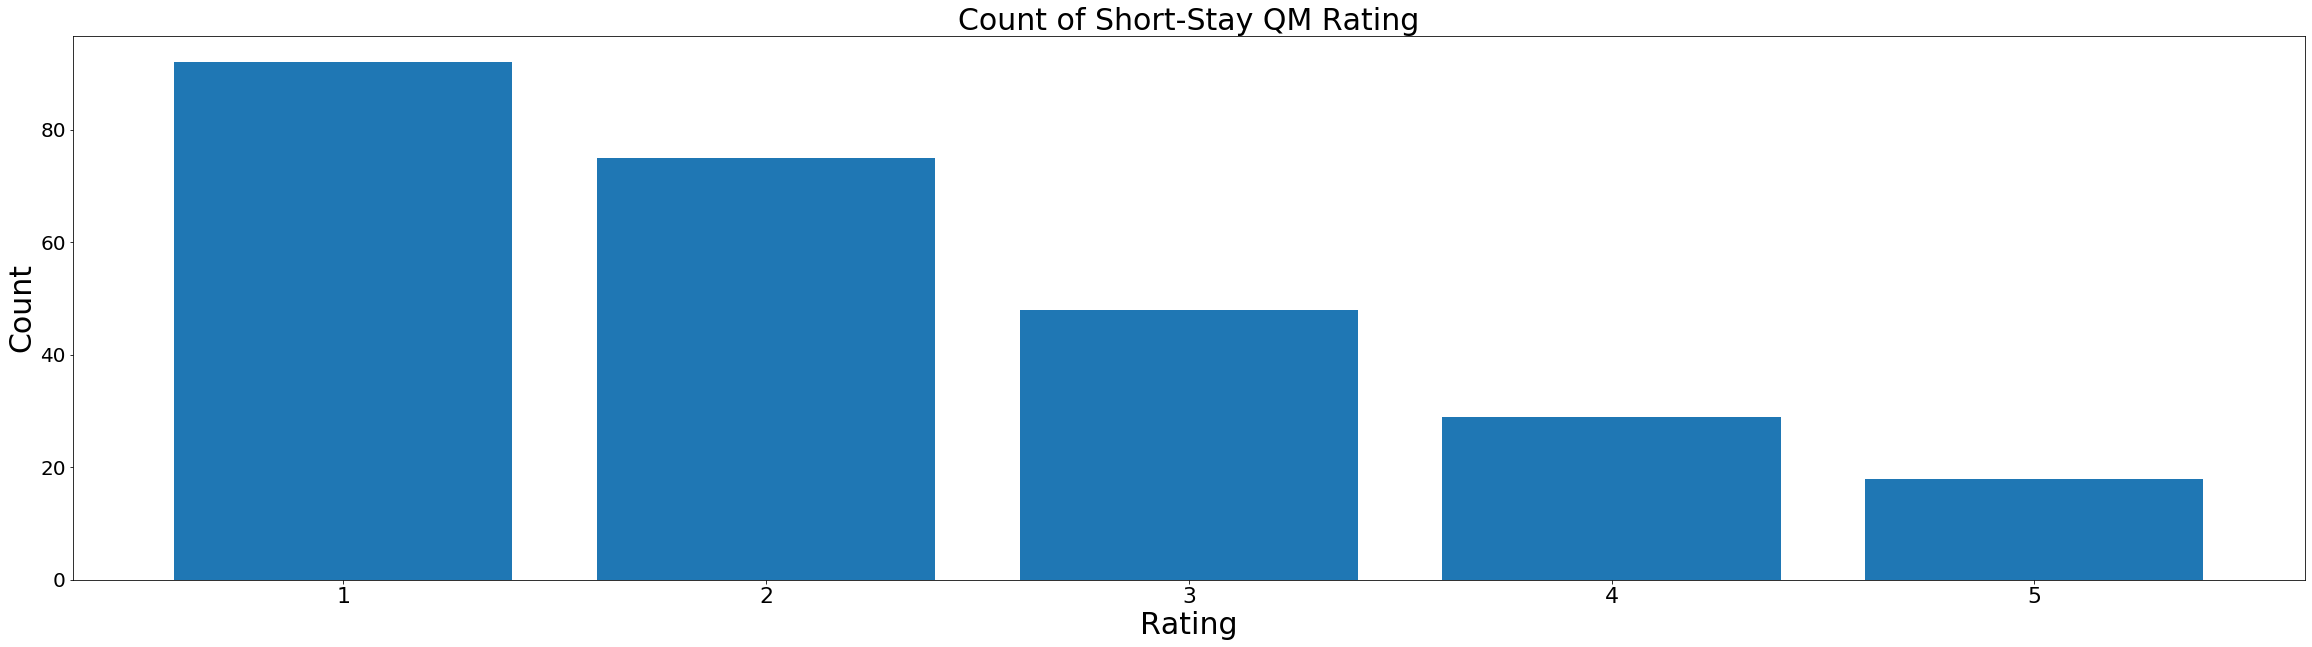

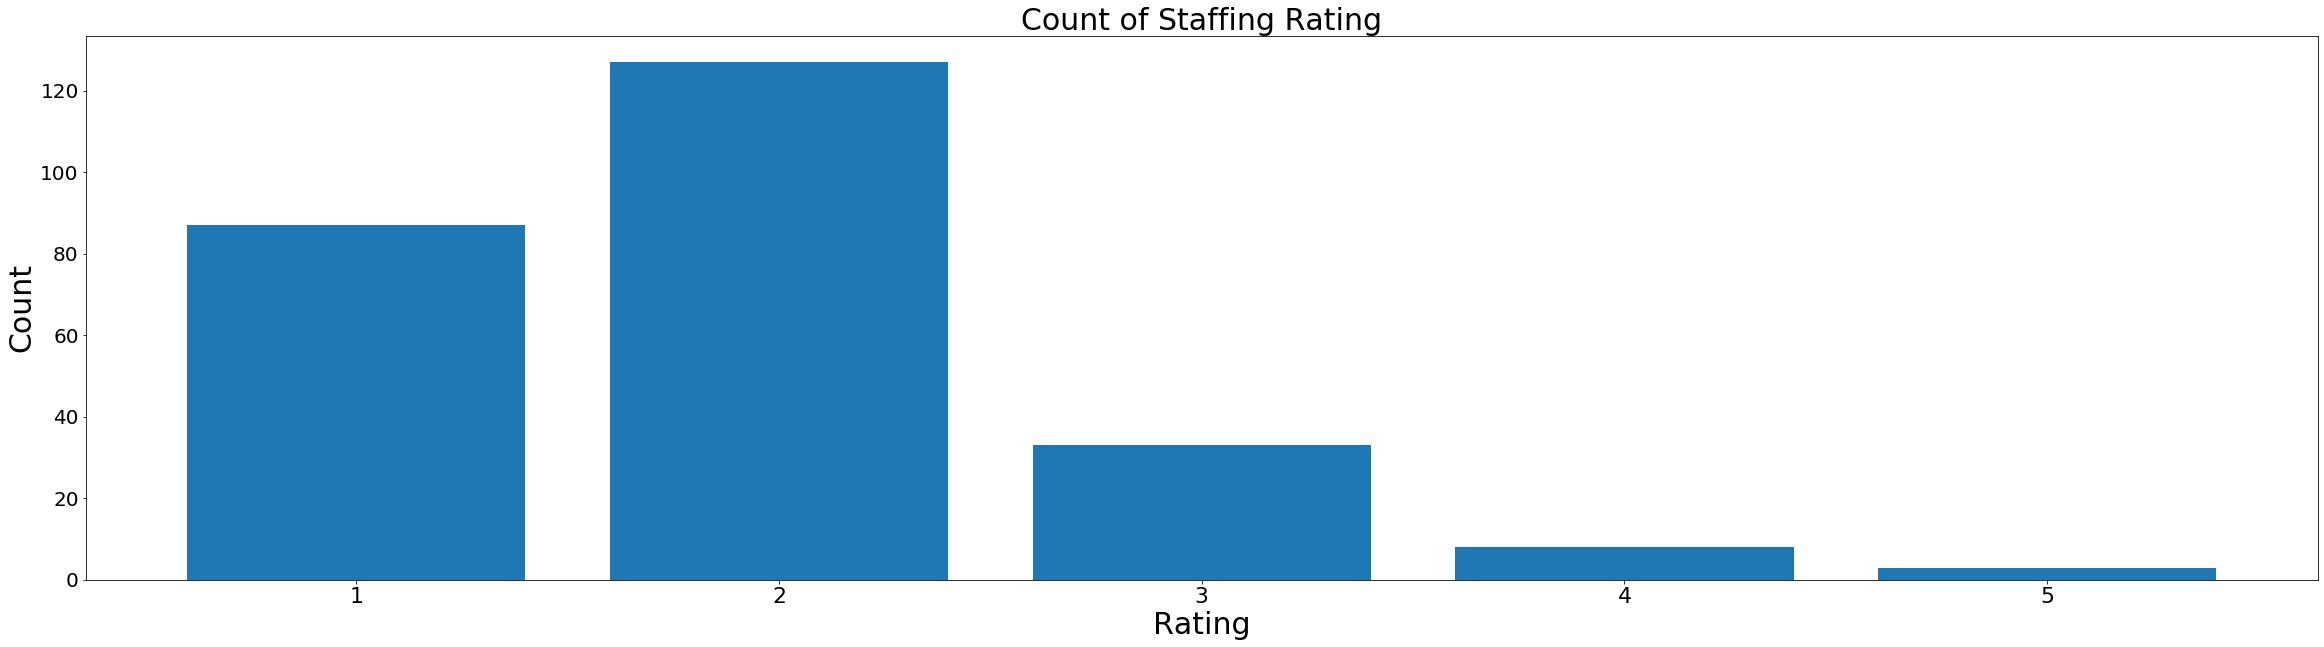

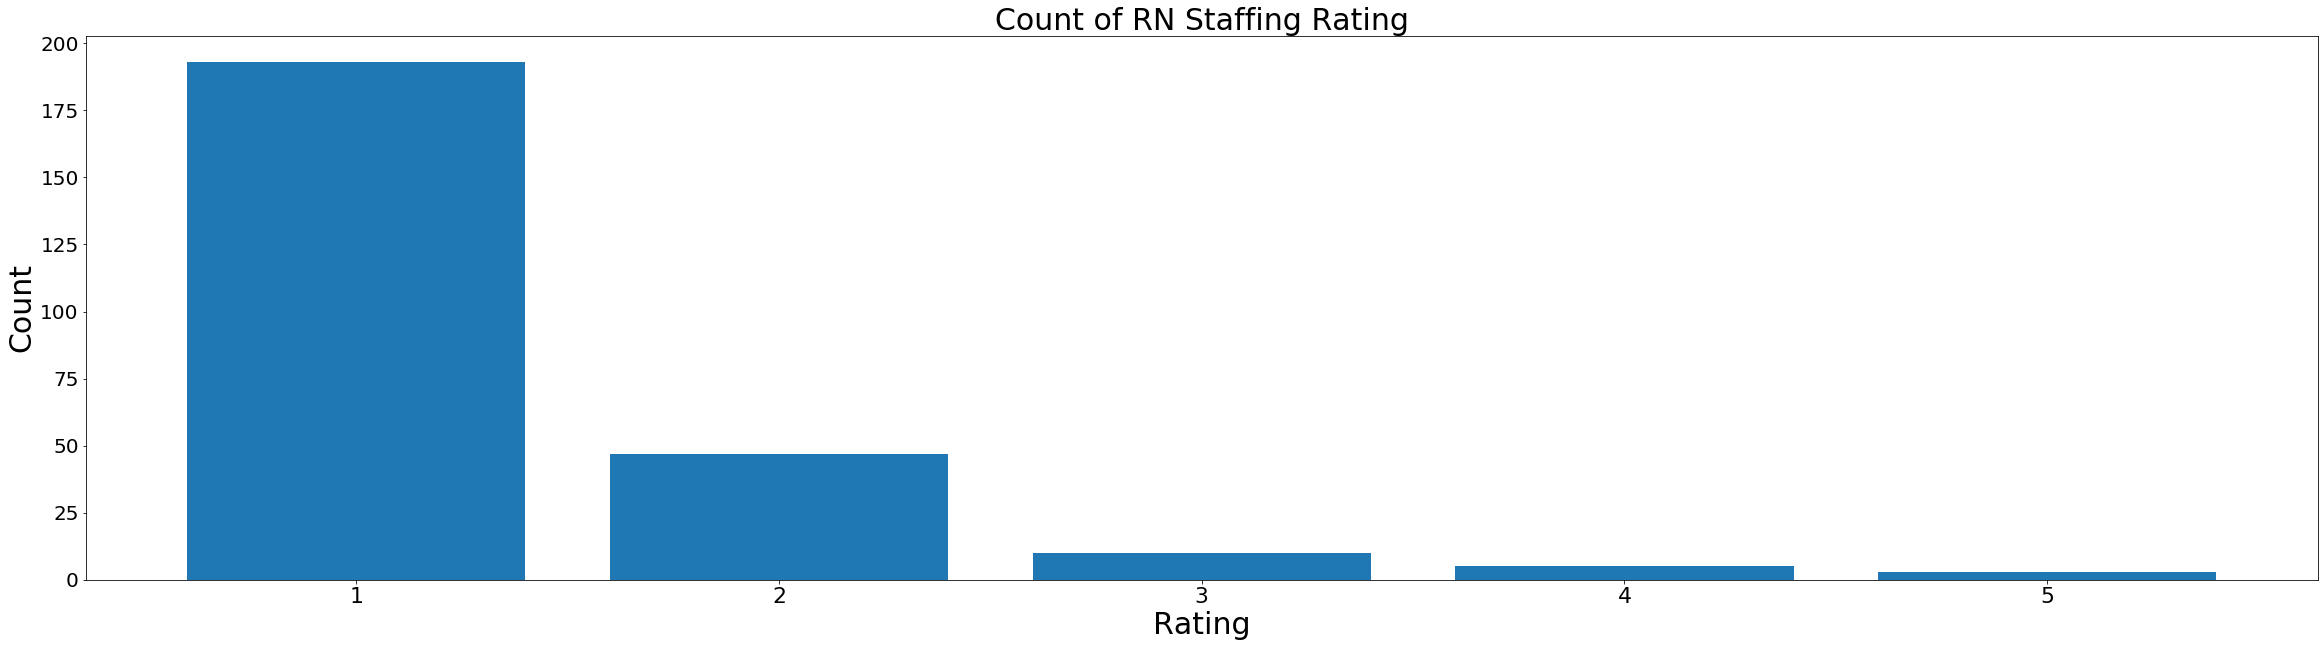

In [10]:
for j in avg_rating:
    rate = s_rate.loc[s_rate['Provider State']=='LA'].groupby(j).count()
    r_sort = s_rate[j].sort_values().dropna()
    r = r_sort.unique()
    fig = plt.figure(figsize = (40, 10)) 
    plt.bar(r,rate['Federal Provider Number'])
    plt.xlabel('Rating', size = 30)
    plt.ylabel('Count', size = 30)
    plt.title('Count of ' +j, size = 30)
    plt.xticks(size = 22)
    plt.yticks(size = 20)

We can see that from that LA has providers which have 1 rating in different areas.

In [11]:
new = n_home[['Provider Number', 'Week Ending', 'Provider State', 'Residents Total Confirmed COVID-19', 
              'Total Number of Occupied Beds', 'Number of All Beds']]

In [12]:
total_cases = new.loc[new['Provider State']=='LA'].groupby(['Week Ending']).sum()

(array([2000., 2500., 3000., 3500., 4000., 4500., 5000.]),
 <a list of 7 Text yticklabel objects>)

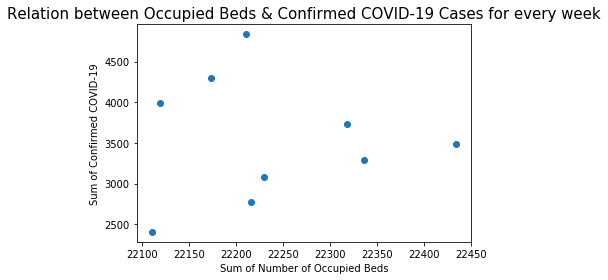

In [13]:
plt.scatter(x=total_cases['Total Number of Occupied Beds'],y=total_cases['Residents Total Confirmed COVID-19'])
plt.xlabel('Sum of Number of Occupied Beds', size = 10)
plt.ylabel('Sum of Confirmed COVID-19', size = 10)
plt.title('Relation between Occupied Beds & Confirmed COVID-19 Cases for every week', size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

The above graph does show a correlation between the two variables but it is hard to see since the data points are less.

In the following graph we will further drill down by analyzing each Federal Provider in LA state

In [14]:
tcases_pnum = new.loc[new['Provider State']=='LA'].groupby(['Week Ending', 'Provider Number']).sum()

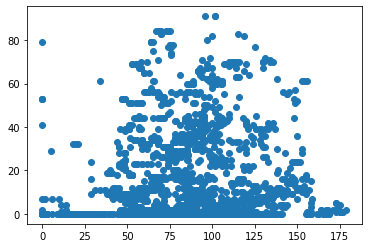

In [15]:
plt.scatter(x=tcases_pnum['Total Number of Occupied Beds'],y=tcases_pnum['Residents Total Confirmed COVID-19'])

In the above graph we can see that there is no distinct correlation, although we can say that higher the number of people in the nursing home higher are the chances of being affected by COVID-19 

The below graph shows the total number of beds in a nursing home and the number of occupied beds each week and by Federal Provider 

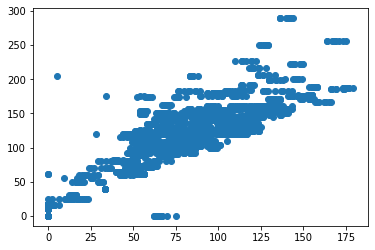

In [16]:
plt.scatter(x=tcases_pnum['Total Number of Occupied Beds'],y=tcases_pnum['Number of All Beds'])

In [17]:
new = n_home[['Provider Number', 'Week Ending', 'Provider State', 'Residents Total Confirmed COVID-19', 
              'Total Number of Occupied Beds', 'Number of All Beds']]

Here we can clearly see that the two factors are connected. Meaning these nursing homes might be full in capacity and thus the staff may be overloaded with work or simply that there is not enough staff for the residents thus contributing to the poor ratings. This can also be confiremed by looking at the Staffing and RN Staffing Rating in the average rating bar chart. 

# Analysis for a good performing state, consider state AL

There are other states with better performance ratings but we are going with AL because of the number of nursing homes it has compared to the other ones like PR, GU, AK, etc.

In [18]:
avg_rating = a_r[['Overall Rating', 'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating', 'Short-Stay QM Rating',
                 'Staffing Rating', 'RN Staffing Rating']]                  

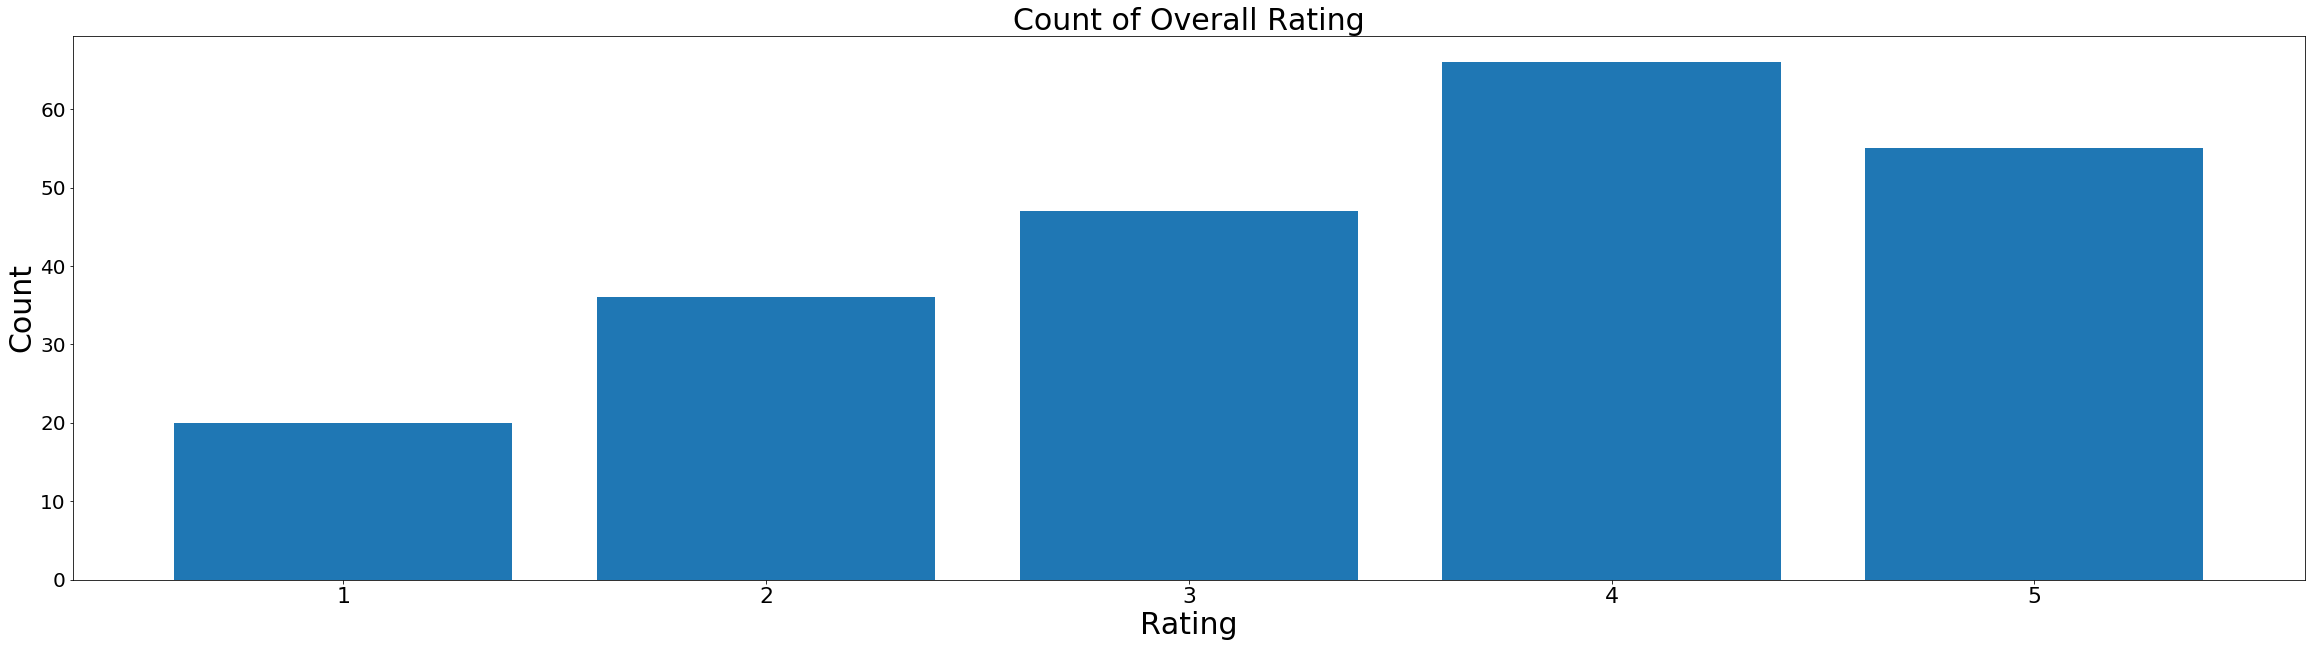

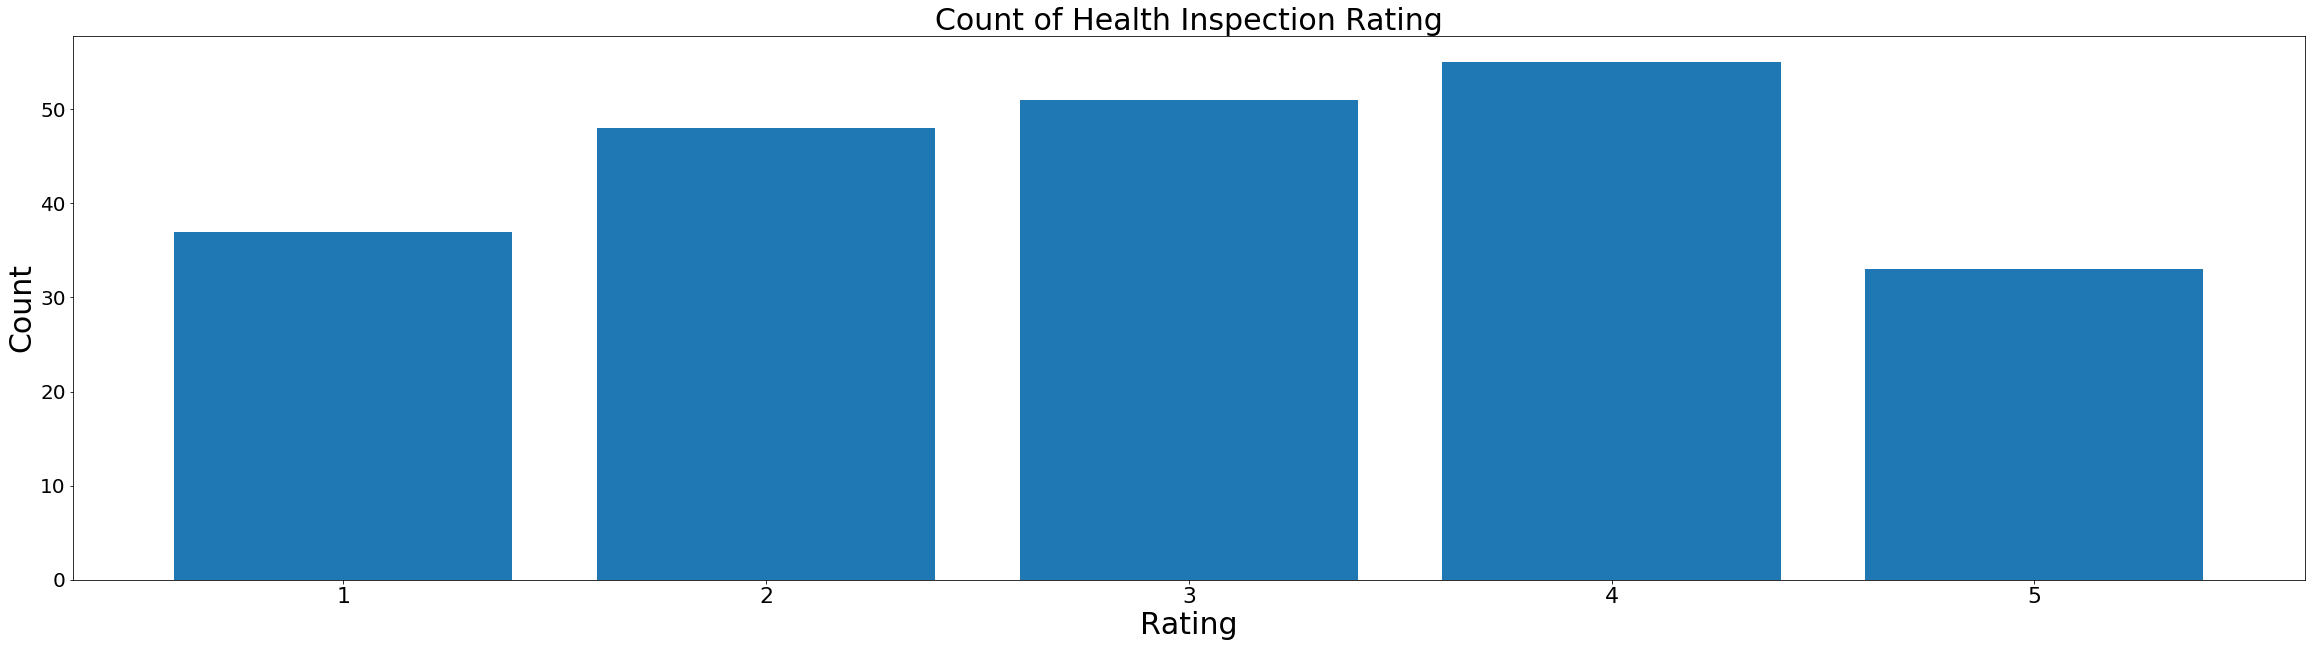

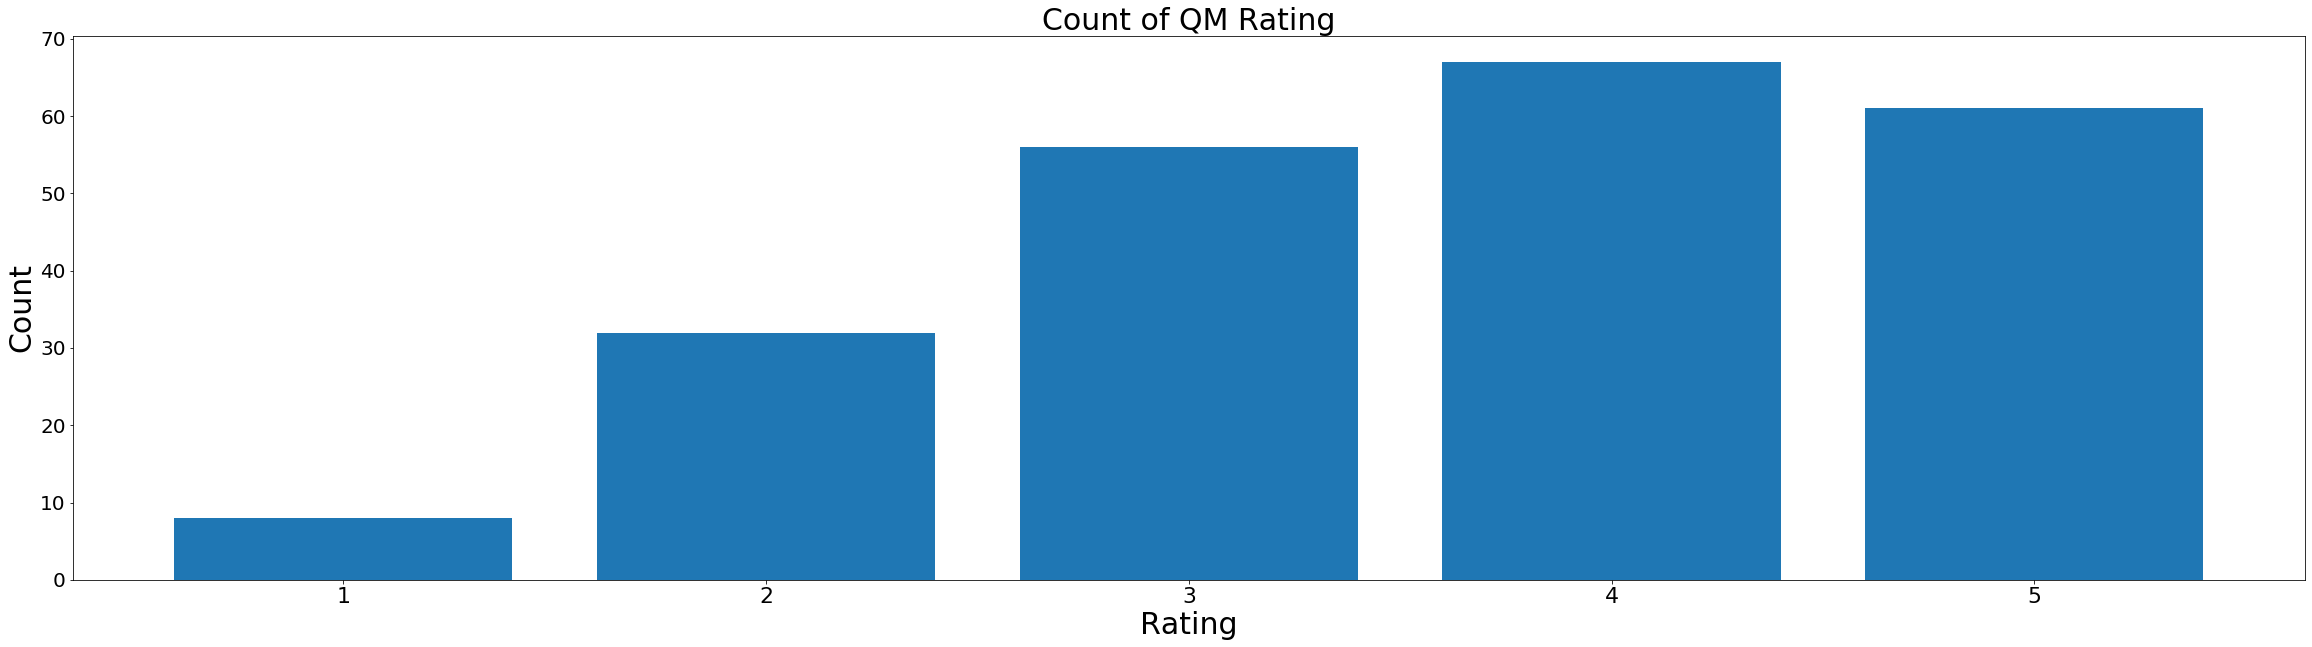

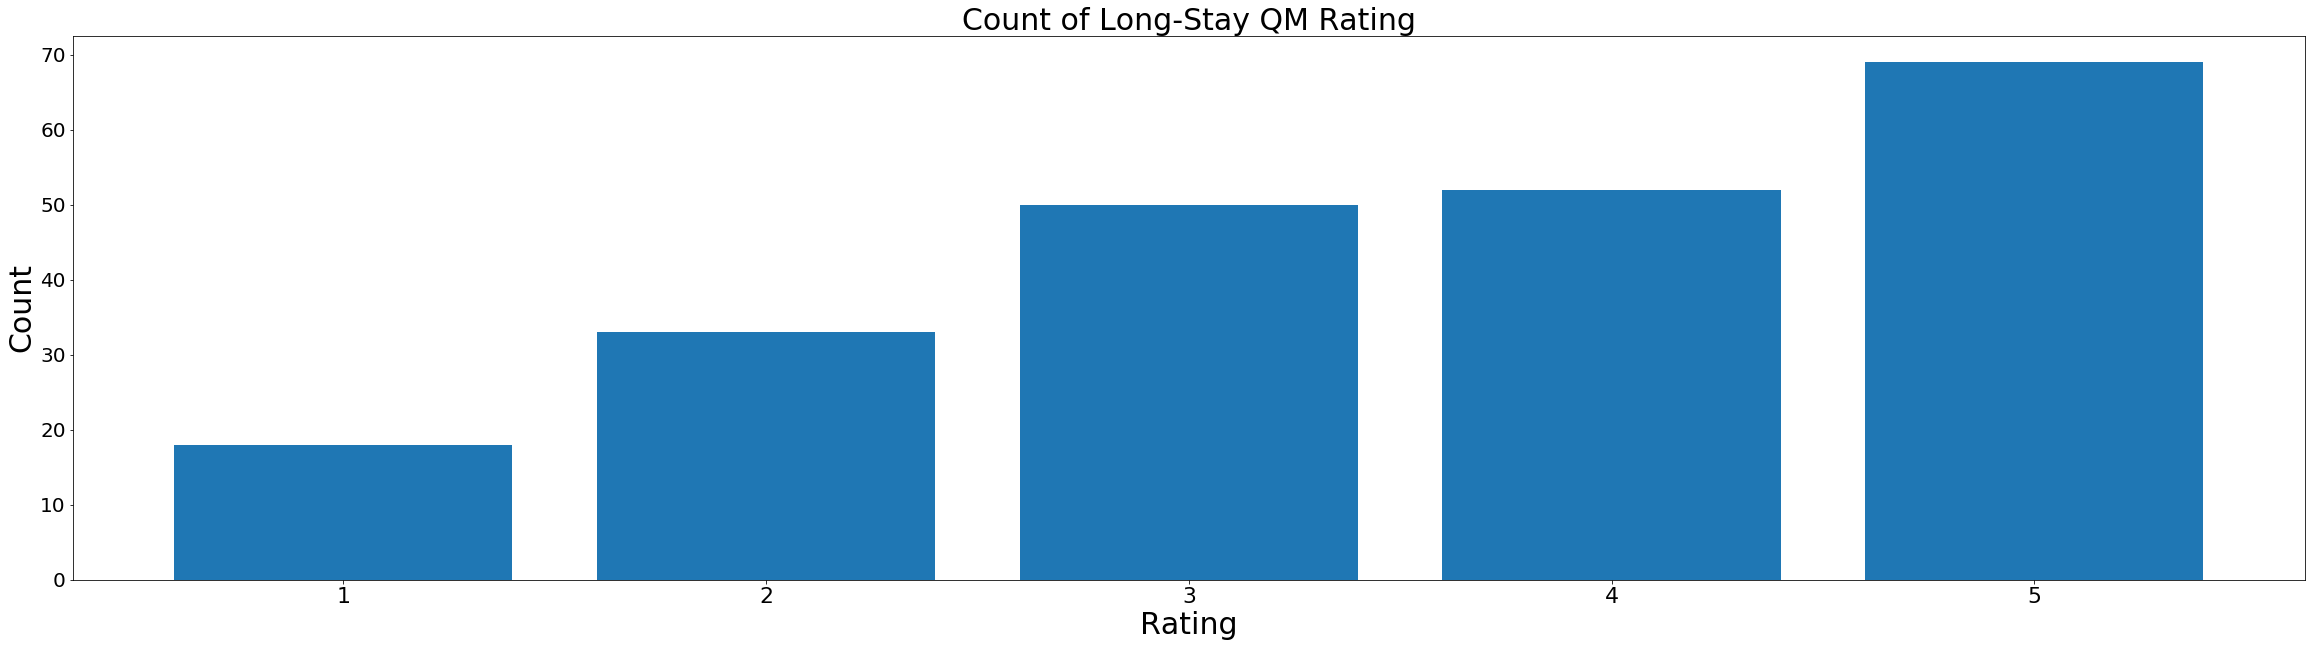

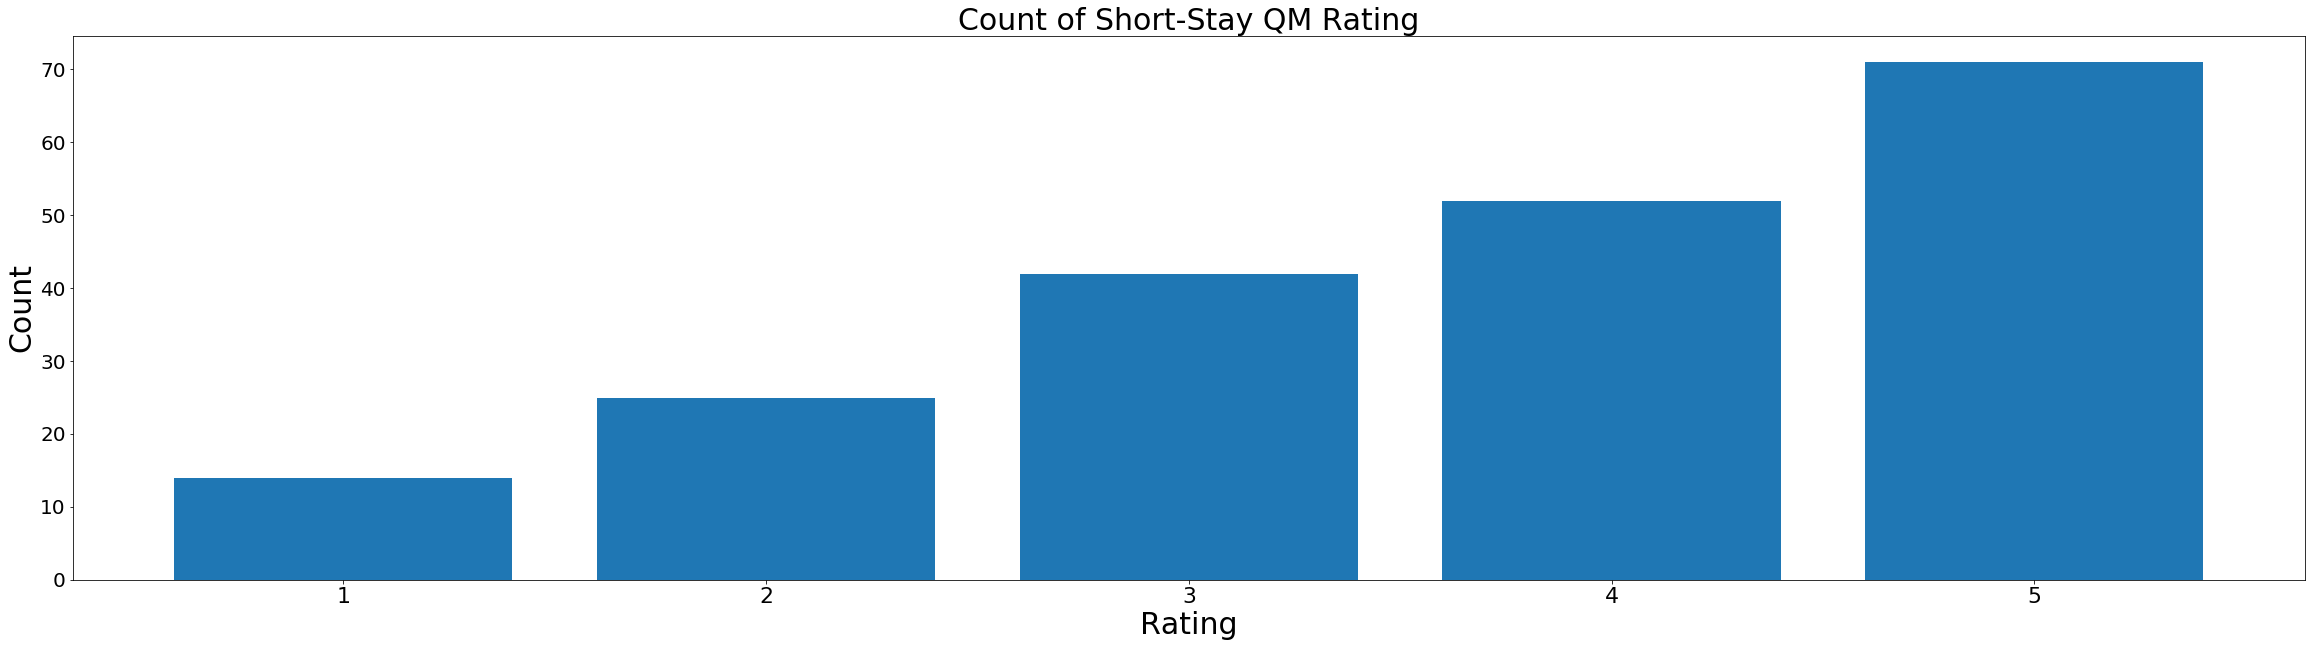

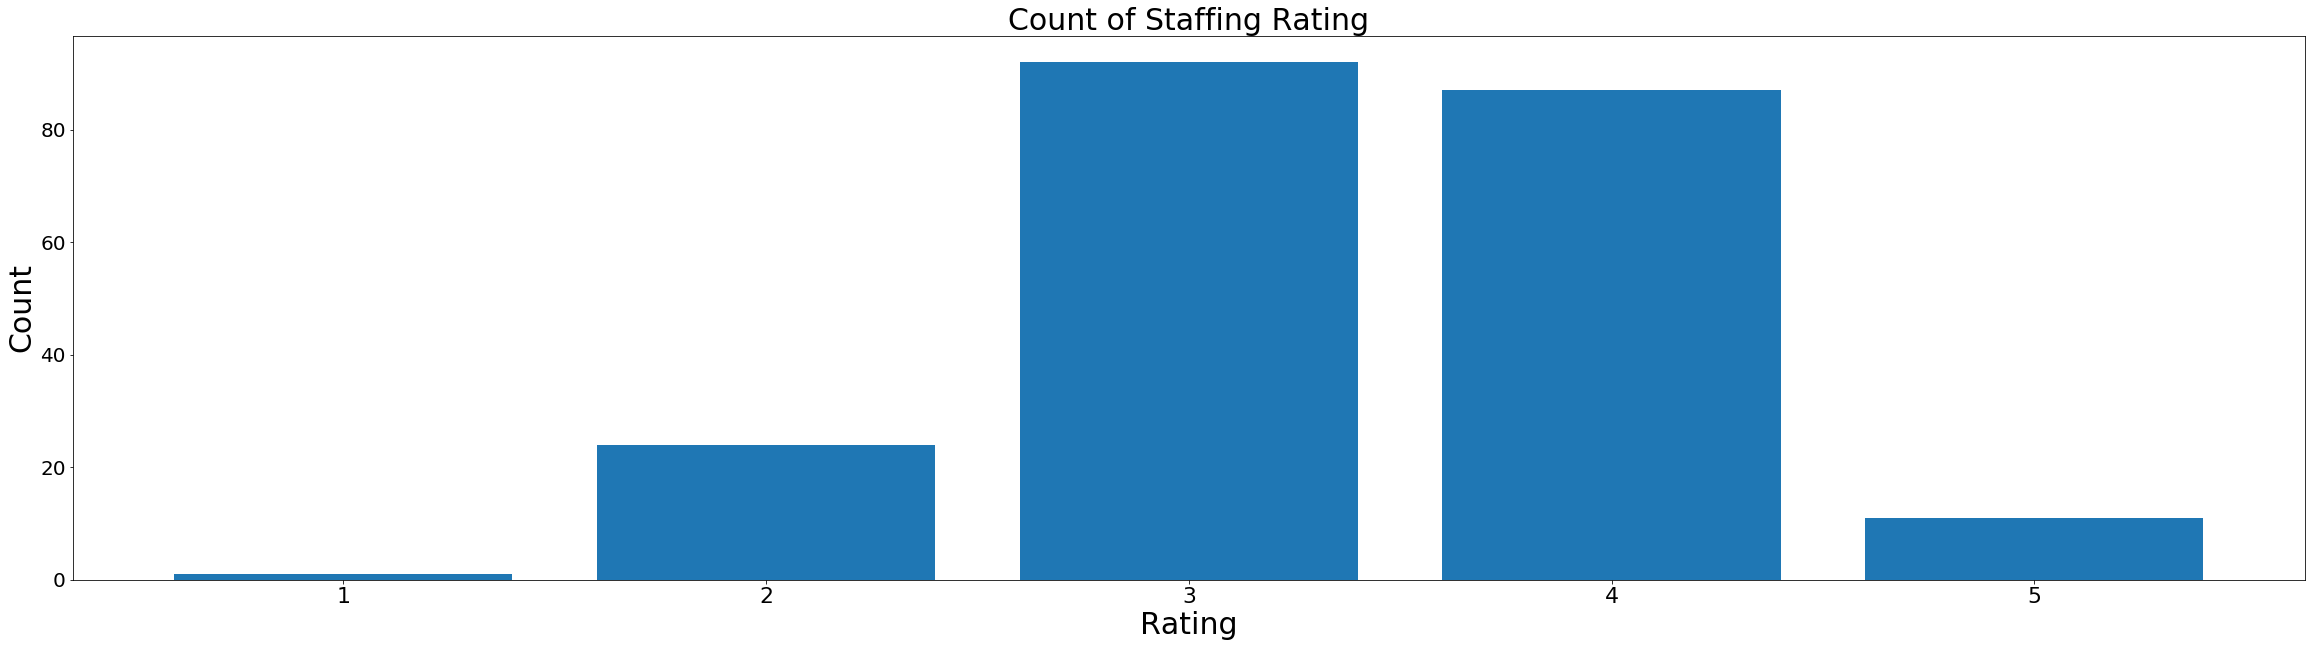

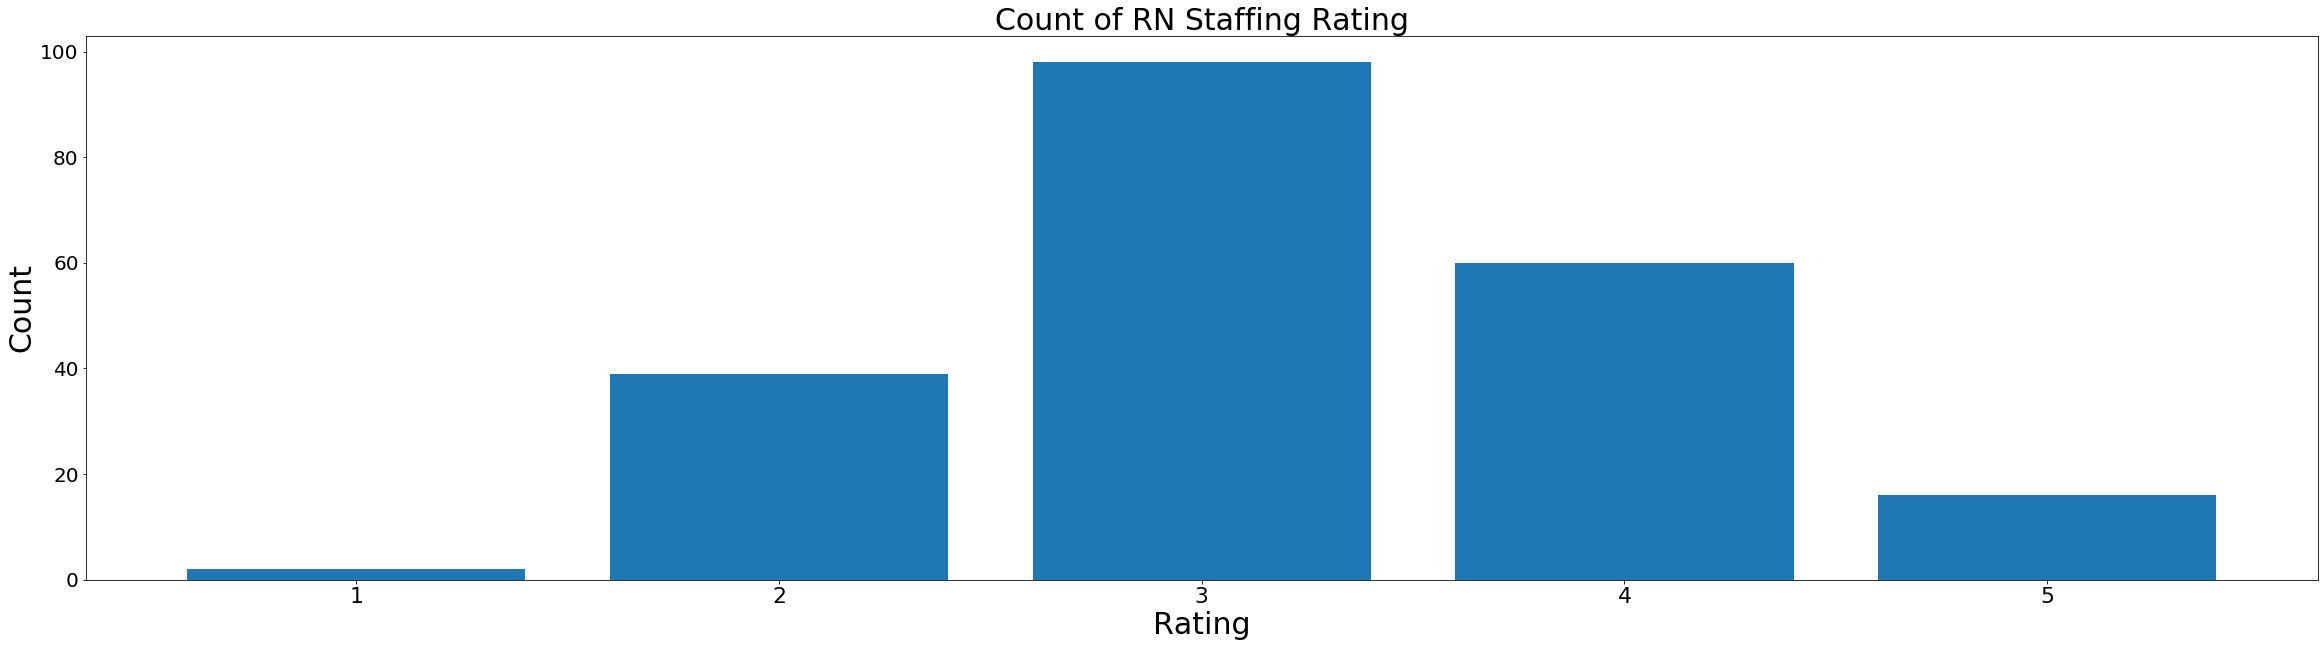

In [20]:
for j in avg_rating:
    rate = s_rate.loc[s_rate['Provider State']=='AL'].groupby(j).count()
    r_sort = s_rate[j].sort_values().dropna()
    r = r_sort.unique()
    fig = plt.figure(figsize = (40, 10)) 
    plt.bar(r,rate['Federal Provider Number'])
    plt.xlabel('Rating', size = 30)
    plt.ylabel('Count', size = 30)
    plt.title('Count of ' +j, size = 30)
    plt.xticks(size = 22)
    plt.yticks(size = 20)

In the above graphs we can see that AL does not have a lot of ratings as 1 in different areas.

In [21]:
total_cases = new.loc[new['Provider State']=='AL'].groupby(['Week Ending']).sum()

(array([ 500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 8 Text yticklabel objects>)

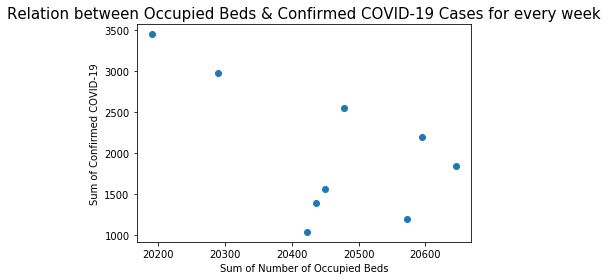

In [22]:
plt.scatter(x=total_cases['Total Number of Occupied Beds'],y=total_cases['Residents Total Confirmed COVID-19'])
plt.xlabel('Sum of Number of Occupied Beds', size = 10)
plt.ylabel('Sum of Confirmed COVID-19', size = 10)
plt.title('Relation between Occupied Beds & Confirmed COVID-19 Cases for every week', size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

In [23]:
tcases_pnum = new.loc[new['Provider State']=='AL'].groupby(['Week Ending', 'Provider Number']).sum()

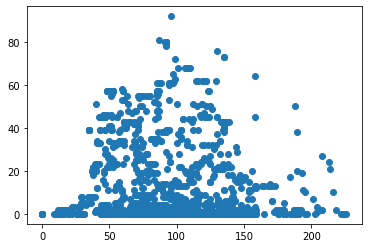

In [24]:
plt.scatter(x=tcases_pnum['Total Number of Occupied Beds'],y=tcases_pnum['Residents Total Confirmed COVID-19'])

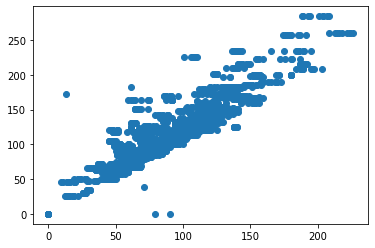

In [25]:
plt.scatter(x=tcases_pnum['Total Number of Occupied Beds'],y=tcases_pnum['Number of All Beds'])

The above three graphs also show similar patterns showing no correlation except for the last graph. It shows similar pattern with that of LA state. Meaning we cannot yet conclude that staff work overload or being understaffed is the sole reason to have low overall ratings.

From the above analysis we can see that staffratings are the main reason for any overall rating. If more effort is put into staff training or hiring more staff could lead to ratings getting higher.